# --------------------*Sells Feature*-----------------
# ------------*Target Column: QuantitySold*-----------------

# Choosing Target Column

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.preprocessing import LabelEncoder

# def clean_dataframe(df):
#     # Create a copy to avoid modifying the original DataFrame
#     cleaned_df = df.copy()
    
#     # Identify and encode categorical columns
#     categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
#     label_encoder = LabelEncoder()
    
#     for col in categorical_cols:
#         try:
#             cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col].astype(str))
#         except:
#             print(f"Could not encode column: {col}")
    
#     # Convert all columns to numeric, coercing errors to NaN
#     numeric_cols = cleaned_df.select_dtypes(include=['object']).columns
#     for col in numeric_cols:
#         cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
    
#     # Drop columns with all NaN values after conversion
#     cleaned_df.dropna(axis=1, how='all', inplace=True)
    
#     return cleaned_df

# def analyze_target_column(df, potential_targets):
#     # Clean the DataFrame first
#     df_cleaned = clean_dataframe(df)
    
#     # Analysis criteria
#     analysis_results = {}
    
#     for target in potential_targets:
#         # 1. Correlation Analysis
#         correlations = df_cleaned.corr()[target].abs().sort_values(ascending=False)
        
#         # 2. Mutual Information Score

#         # Exclude non-numeric columns and the targets themselves
#         numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
#         X = df_cleaned[numeric_cols].drop(columns=potential_targets)
#         y = df_cleaned[target]
        
#         mi_scores = mutual_info_regression(X, y)
#         mi_series = pd.Series(mi_scores, index=X.columns)
        
#         # 3. Skewness and Distribution
#         skewness = y.skew()
        
#         # 4. Variance
#         variance = y.var()
        
#         # 5. Statistical Summary
#         summary_stats = y.describe()
        
#         analysis_results[target] = {
#             'top_correlations': correlations.head(5),
#             'mutual_info_top5': mi_series.sort_values(ascending=False).head(5),
#             'skewness': skewness,
#             'variance': variance,
#             'summary_stats': summary_stats
#         }
        
#         # Visualization
#         plt.figure(figsize=(15, 5))
        
#         # Histogram
#         plt.subplot(131)
#         plt.hist(y, bins=30)
#         plt.title(f'{target} Distribution')
#         plt.xlabel('Value')
#         plt.ylabel('Frequency')
        
#         # Box Plot
#         plt.subplot(132)
#         plt.boxplot(y)
#         plt.title(f'{target} Box Plot')
        
#         # Kernel Density Estimation
#         plt.subplot(133)
#         y.plot(kind='density')
#         plt.title(f'{target} Density')
        
#         plt.tight_layout()
#         plt.suptitle(f'Analysis of {target}')
#         plt.show()
    
#     return analysis_results

# # Usage
# dfSales = pd.read_csv("../DataSalesPurchaseFeatured.csv")

# # Updated potential targets: focusing on sales metrics
# potential_targets = ['QuantitySold', 'TotalSalesAmount', 'GrossMargin']

# results = analyze_target_column(dfSales, potential_targets)

# # Print detailed results
# for target, analysis in results.items():
#     print(f"\n--- Analysis for {target} ---")
#     print("\nTop 5 Correlations:")
#     print(analysis['top_correlations'])
#     print("\nTop 5 Mutual Information Scores:")
#     print(analysis['mutual_info_top5'])
#     print("\nSkewness:", analysis['skewness'])
#     print("Variance:", analysis['variance'])
#     print("\nSummary Statistics:")
#     print(analysis['summary_stats'])



# Data Preprocessing for Purchase Optimization with QuantitySold as target column

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

# Load the data
dfPurchases = pd.read_csv("../DataSalesPurchaseFeatured.csv")

# Common columns to drop
columns_to_drop = [
    "SalesName", "ProductName", "PurchaseName", 
    "VendorTaxGroup", "VendorCurrency", "CustomerPaymentTermID", "PurchaseOrderAccount",
    "VendorGroupAvgPurchase", "CustomerGroupAvgSales", 
    "DeliveryMonthSin", "DeliveryMonthCos", "PriceRatio", "SalesPriceMarkupRatio", "SoldToPurchasedRatio"
]

# Drop specified columns
dfPurchases.drop(columns=[col for col in columns_to_drop if col in dfPurchases.columns], inplace=True)


# Sort and remove duplicates
dfPurchases = dfPurchases.sort_values(by=["PurchaseYear", "PurchaseMonth"], ascending=True)
dfPurchases = dfPurchases.drop_duplicates()

# Categorical Columns Classification
nominal_cols = [
    "CustomerID", "CustomerGroup", "DeliveryMode", 
    "CustomerTaxGroup", "ProductID", 
    "VendorID", "VendorGroup", "PurchaseStatus"
]

ordinal_cols = [
    "CustomerCreditRating", 
    "ProductProfitabilityCategory"
]

binary_cols = [
    "HighCreditRisk", 
    "DeliveryIsWeekend", 
    "PurchaseIsWeekend",
    "IsEndOfFiscalQuarter",
    "IsHighTurnoverProduct"
]


numerical_cols = [
    "CustomerCreditMax", "QuantitySold", "SalesPrice", 
    "TotalSalesAmount", "QuantityPurchased", "PurchasePrice", 
    "TotalPurchaseAmount", "InventoryCostPosted", 
    "InventoryQuantityChange", "DeliveryYear", "DeliveryMonth", 
    "DeliveryQuarter", "DeliveryDayOfWeek", "PurchaseYear", 
    "PurchaseMonth", "PurchaseQuarter", "PurchaseDayOfWeek", 
    "OrderToDeliveryDays", "GrossMargin", "GrossMarginPercentage", 
    "CostOfSalesRatio", "InventoryTurnoverRate", 
    "InventoryCostPerUnit", "CreditUtilizationRatio", 
    "CreditRatingScore", "InventoryEfficiency", "MonthlySalesSeasonality"
]

df_unencodedColumns = dfPurchases[["CustomerID", "ProductID"]].copy()
df_unencodedColumns = df_unencodedColumns.set_index(dfPurchases.index)

# 1. Nominal Categorical Encoding (Target Encoding) using QuantitySold as the target
target_encoder = TargetEncoder(cols=nominal_cols)
dfPurchases[nominal_cols] = target_encoder.fit_transform(
    dfPurchases[nominal_cols], 
    dfPurchases['QuantitySold']
)


# 2. Ordinal Encoding (Label Encoding)
label_encoder = LabelEncoder()
for col in ordinal_cols:
    if col in dfPurchases.columns:
        dfPurchases[col] = label_encoder.fit_transform(dfPurchases[col].astype(str))


# 3. Binary Encoding (0/1)
for col in binary_cols:
    if col in dfPurchases.columns:
        dfPurchases[col] = dfPurchases[col].map({'Yes': 1, 'No': 0, 1: 1, 0: 0})


# Display information about the processed dataframe
print(f"DataFrame shape: {dfPurchases.shape}")
print("\nFirst 5 rows:")
print(dfPurchases.head())


# Set display option for all columns
pd.set_option('display.max_columns', None)


DataFrame shape: (411836, 44)

First 5 rows:
     CustomerID  CustomerCreditMax  CustomerCreditRating  CustomerGroup  \
907   10.598654           250000.0                     1      15.157883   
908   10.598654           250000.0                     1      15.157883   
909   10.598654           250000.0                     1      15.157883   
910   10.598654           250000.0                     1      15.157883   
911   10.598654           250000.0                     1      15.157883   

     DeliveryMode  CustomerTaxGroup  ProductID  QuantitySold  SalesPrice  \
907     18.288353          8.907401  21.661157         -16.0       500.0   
908     18.288353          8.907401  21.661157         -16.0       500.0   
909     18.288353          8.907401  21.661157         -16.0       500.0   
910     18.288353          8.907401  21.661157         -16.0       500.0   
911     18.288353          8.907401  21.661157         -16.0       500.0   

     TotalSalesAmount  ...  CreditUtilizationRa

# Look for high correlations between QuantitySold and other variables.

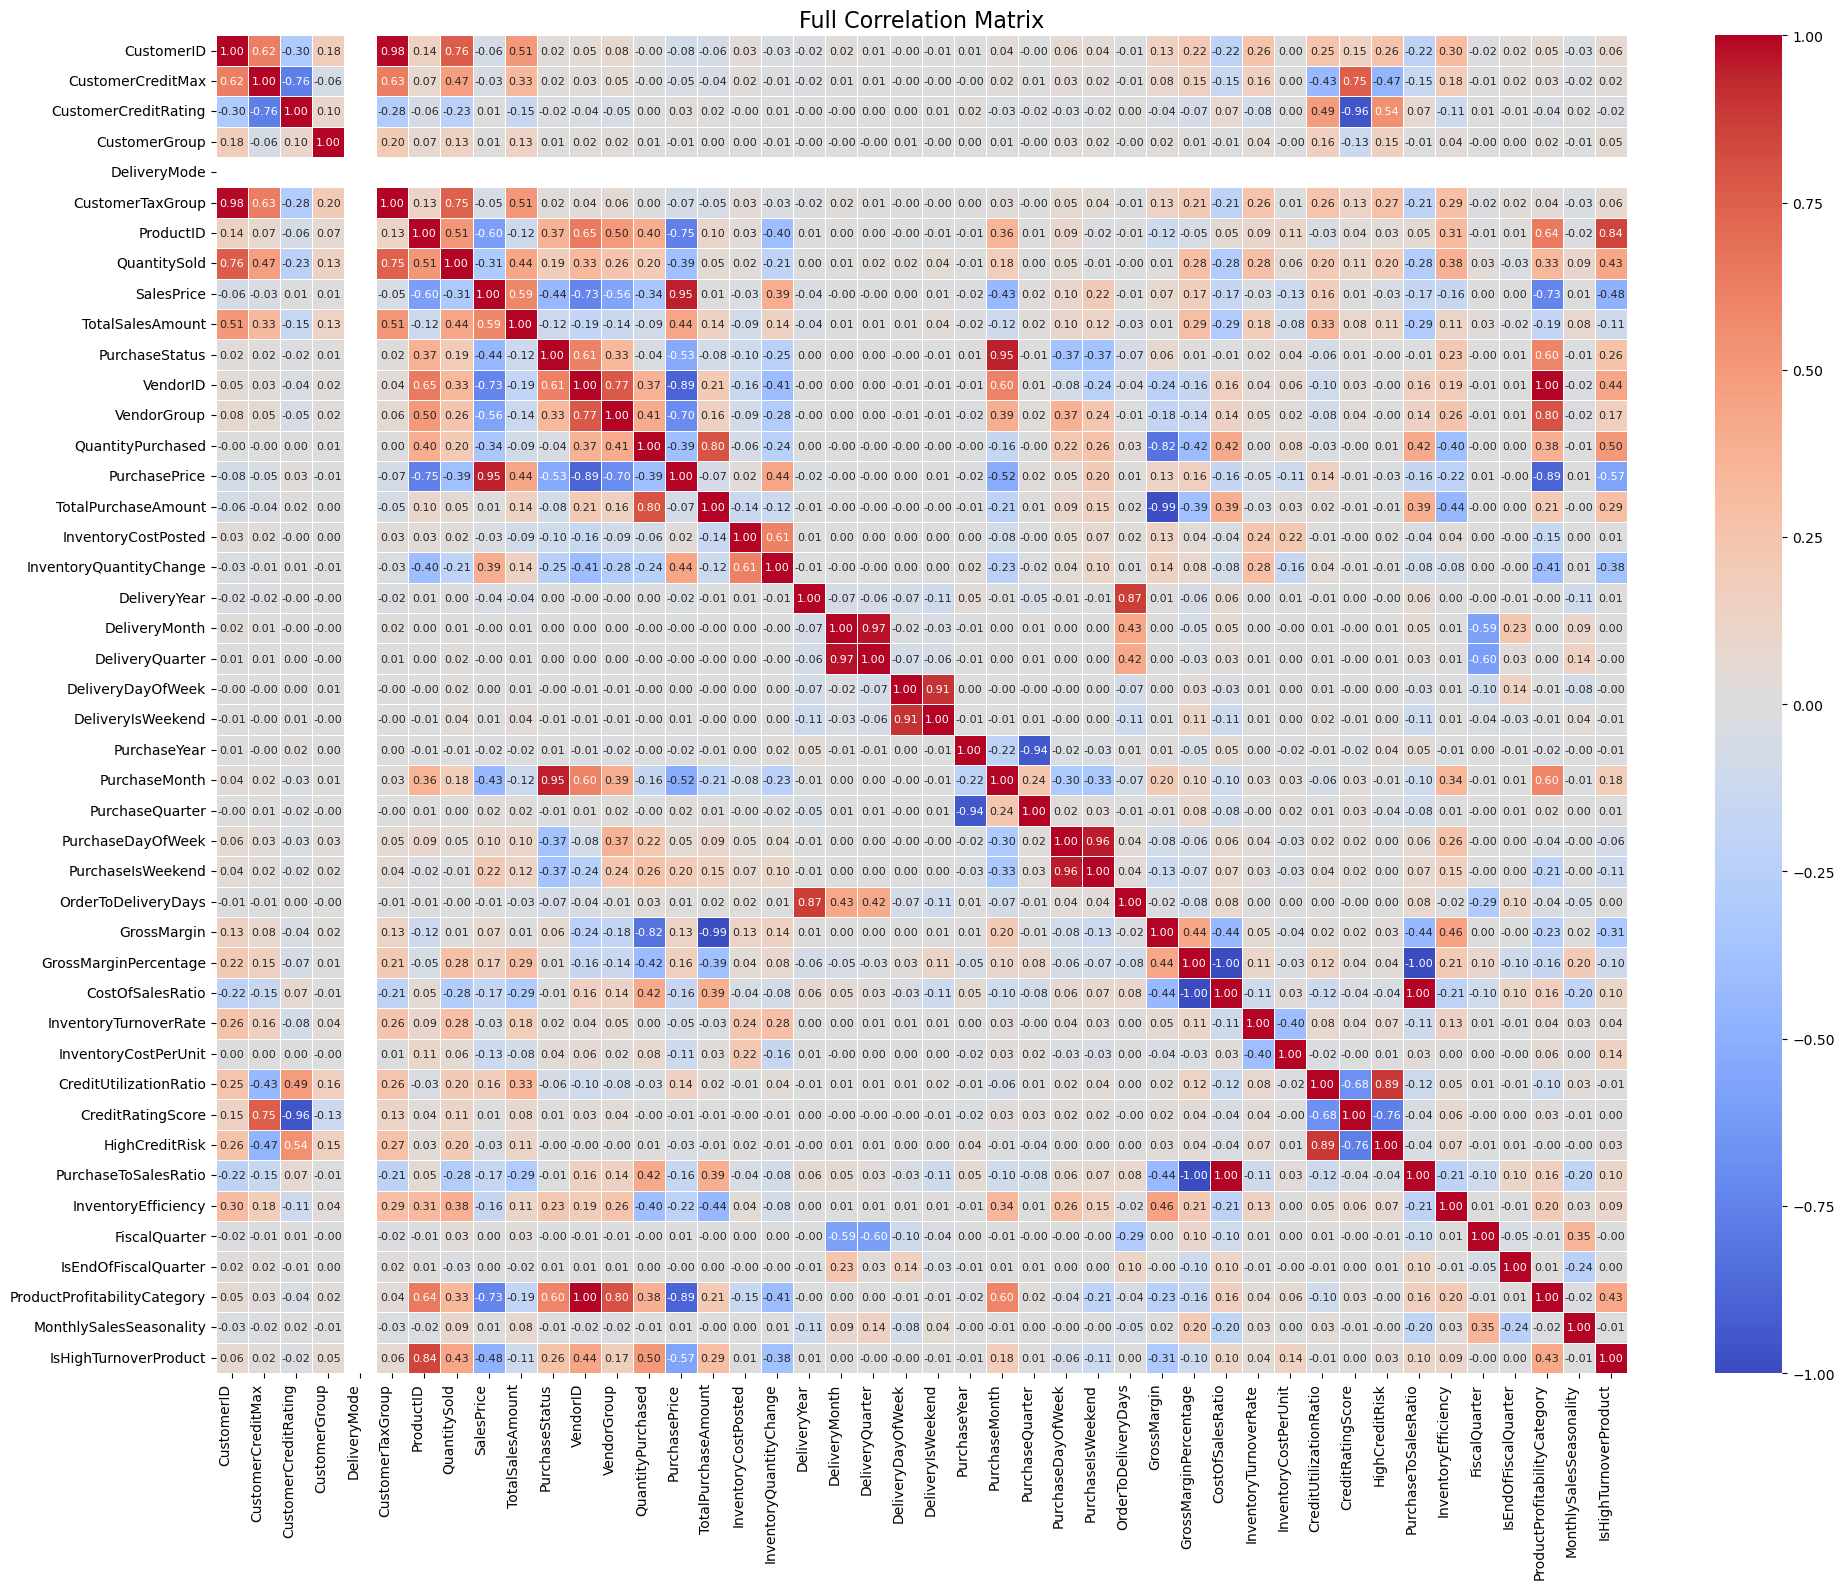

High Correlation Pairs (|correlation| > 0.75):
                  Feature 1                     Feature 2  Correlation
830        CostOfSalesRatio          PurchaseToSalesRatio     1.000000
404                VendorID  ProductProfitabilityCategory     0.998715
3                CustomerID              CustomerTaxGroup     0.984472
603           DeliveryMonth               DeliveryQuarter     0.971137
750       PurchaseDayOfWeek             PurchaseIsWeekend     0.960732
278              SalesPrice                 PurchasePrice     0.950310
355          PurchaseStatus                 PurchaseMonth     0.947359
650       DeliveryDayOfWeek             DeliveryIsWeekend     0.905747
859  CreditUtilizationRatio                HighCreditRisk     0.887811
587            DeliveryYear           OrderToDeliveryDays     0.869309
236               ProductID         IsHighTurnoverProduct     0.843892
435             VendorGroup  ProductProfitabilityCategory     0.804479
439       QuantityPurchased   

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute the full correlation matrix for numeric columns
corr_matrix = dfPurchases.corr(numeric_only=True)

# Plot the full correlation matrix with adjusted formatting
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            annot_kws={"size": 8}, linewidths=0.5)
plt.xticks(rotation=90, ha="right")
plt.yticks(rotation=0)
plt.title("Full Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

# Extract upper triangle of the correlation matrix (excluding self-correlation)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle = corr_matrix.where(mask)

# Convert to long format and filter correlations with absolute value > 0.75
high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
    .query("abs(Correlation) > 0.75")
    .sort_values(by="Correlation", ascending=False)
)

# Display high correlation pairs for all features
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("High Correlation Pairs (|correlation| > 0.75):")
print(high_corr_pairs)

# Additionally, extract and display features highly correlated with the target 'QuantitySold'
target_corr = corr_matrix['QuantitySold'].abs().sort_values(ascending=False)
high_corr_with_target = target_corr[target_corr > 0.75]

print("\nFeatures with |correlation| > 0.75 with QuantitySold:")
print(high_corr_with_target)


## Delete columns with high corr 

In [4]:
# List of columns to drop based on high-correlation analysis
columns_to_drop = [
    # Redundant calculation columns
    'VendorGroupAvgPurchase',
    'CustomerGroupAvgSales',
    'DeliveryMonthSin',
    'DeliveryMonthCos',
    'CostOfSalesRatio',         # Perfect correlation with PurchaseToSalesRatio (1.0) and perfectly (negatively) correlated with GrossMarginPercentage
    'SoldToPurchasedRatio',
    'SalesPriceMarkupRatio',
    'PriceRatio',
    
    # Redundant features based on high correlations
    'GrossMarginPercentage',    # Perfect negative correlation with CostOfSalesRatio (-1.0)
    'DeliveryQuarter',          # High correlation with DeliveryMonth (0.97)
    'DeliveryIsWeekend',        # High correlation with DeliveryDayOfWeek (0.91)
    'PurchaseIsWeekend',        # High correlation with PurchaseDayOfWeek (0.96)
    'PurchaseQuarter',          # High correlation with PurchaseYear (-0.94)
    'HighCreditRisk',           # High correlation with CreditUtilizationRatio (0.89)
    'CreditRatingScore',        # High correlation with CustomerCreditRating (-0.96)
    'GrossMargin',              # Redundant with other margin related metrics
    
    # Other redundant or non-predictive columns
    'VendorTaxGroup',
    'VendorCurrency',
    'PurchaseOrderAccount',
    'PurchaseName',
    'ProductName',
    'SalesName',
    
    'ProductProfitabilityCategory',
    'DeliveryYear',
    'TotalPurchaseAmount',
    'CustomerTaxGroup',
    'VendorGroup',
    'CustomerCreditMax',
    'PurchasePrice',
    'PurchaseStatus',
    'IsHighTurnoverProduct'
]

# Ensure only existing columns are dropped (and keep QuantitySold intact)
columns_to_drop = [col for col in columns_to_drop if col in dfPurchases.columns]

# Create a cleaned dataframe with redundant columns removed
dfSales_cleaned = dfPurchases.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns. Remaining columns: {dfSales_cleaned.shape[1]}")
print("Columns were deleted successfully!")


Dropped 18 columns. Remaining columns: 26
Columns were deleted successfully!


## Check Corr again

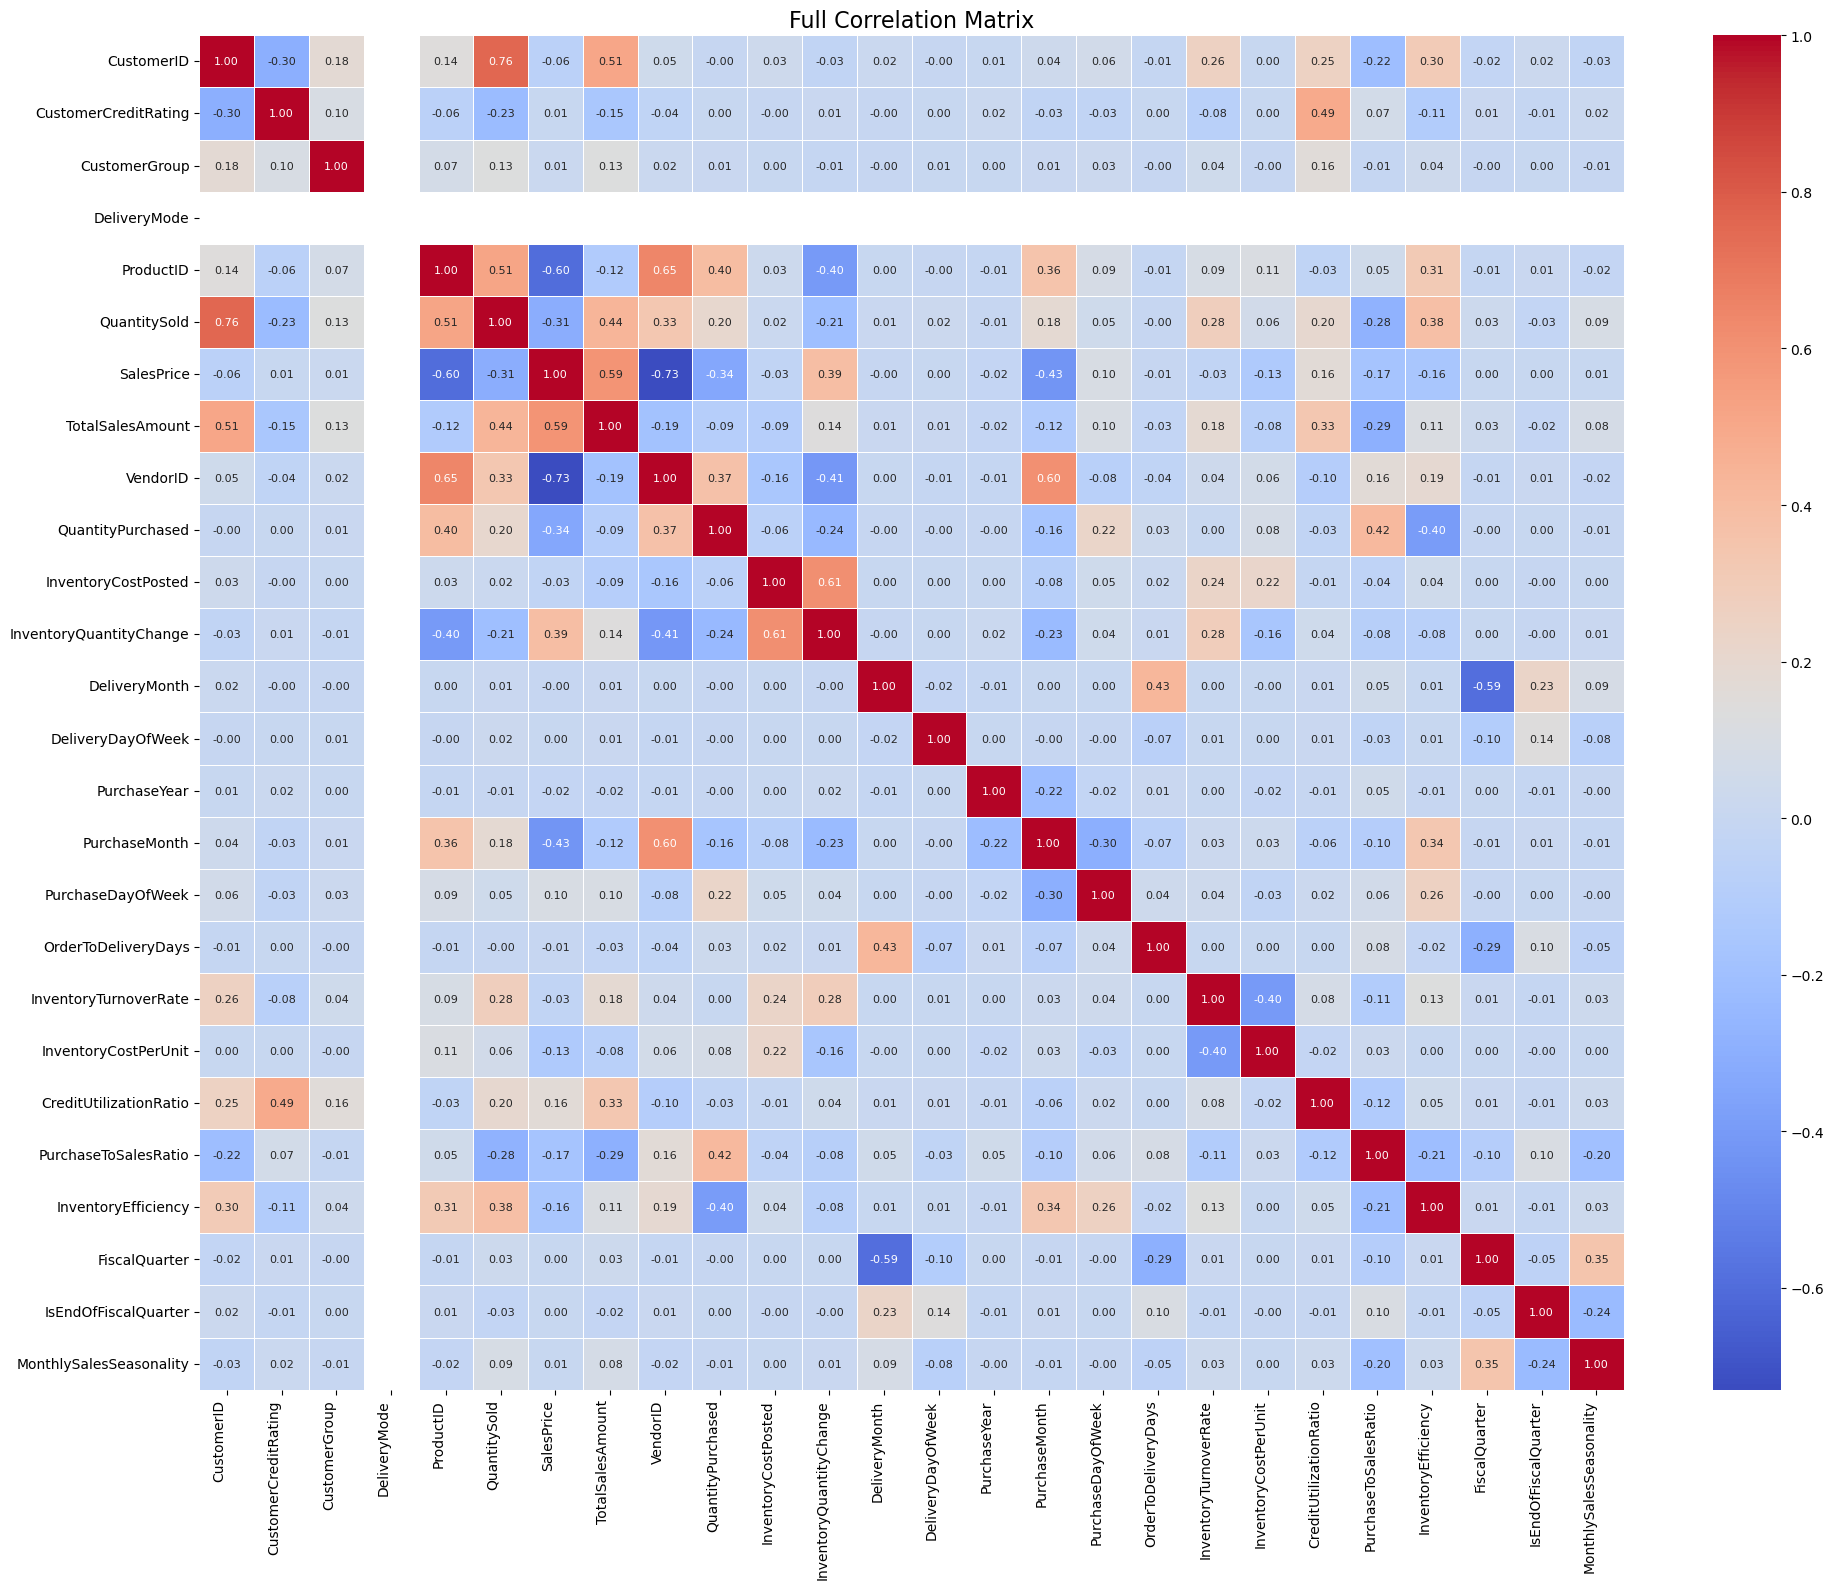

High Correlation Pairs (|correlation| > 0.75):
    Feature 1     Feature 2  Correlation
3  CustomerID  QuantitySold     0.760391

Features with |correlation| > 0.75 with QuantitySold:
QuantitySold    1.000000
CustomerID      0.760391
Name: QuantitySold, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute the full correlation matrix for numeric columns
corr_matrix = dfSales_cleaned.corr(numeric_only=True)

# Plot the full correlation matrix with adjusted formatting
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            annot_kws={"size": 8}, linewidths=0.5)
plt.xticks(rotation=90, ha="right")
plt.yticks(rotation=0)
plt.title("Full Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

# Extract upper triangle of the correlation matrix (excluding self-correlation)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle = corr_matrix.where(mask)

# Convert to long format and filter correlations with absolute value > 0.75
high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
    .query("abs(Correlation) > 0.75")
    .sort_values(by="Correlation", ascending=False)
)

# Display high correlation pairs for all features
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("High Correlation Pairs (|correlation| > 0.75):")
print(high_corr_pairs)

# Additionally, extract and display features highly correlated with the target 'QuantitySold'
target_corr = corr_matrix['QuantitySold'].abs().sort_values(ascending=False)
high_corr_with_target = target_corr[target_corr > 0.75]

print("\nFeatures with |correlation| > 0.75 with QuantitySold:")
print(high_corr_with_target)


In [6]:
dfSales_cleaned.head()



,CustomerID,CustomerCreditRating,CustomerGroup,DeliveryMode,ProductID,QuantitySold,SalesPrice,TotalSalesAmount,VendorID,QuantityPurchased,InventoryCostPosted,InventoryQuantityChange,DeliveryMonth,DeliveryDayOfWeek,PurchaseYear,PurchaseMonth,PurchaseDayOfWeek,OrderToDeliveryDays,InventoryTurnoverRate,InventoryCostPerUnit,CreditUtilizationRatio,PurchaseToSalesRatio,InventoryEfficiency,FiscalQuarter,IsEndOfFiscalQuarter,MonthlySalesSeasonality
907,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-19800.0,-66.0,1,0,2016,11,6,71,-0.242424,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942
908,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-19500.0,-65.0,1,0,2016,11,6,71,-0.246154,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942
909,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18900.0,-63.0,1,0,2016,11,6,71,-0.253968,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942
910,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18600.0,-62.0,1,0,2016,11,6,71,-0.258065,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942
911,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18300.0,-61.0,1,0,2016,11,6,71,-0.262295,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942


## My Columns 

In [7]:
# Define a mapping for the specific columns to rename
rename_mapping = {
    "PurchaseYear": "SalesYear",
    "PurchaseMonth": "SalesMonth",
    "PurchaseDayOfWeek": "SalesDayOfWeek"
}

# Rename the columns in the DataFrame
dfSales_cleaned.rename(columns=rename_mapping, inplace=True)

# Verify the changes by printing the updated column names
print("Updated DataFrame Columns:")
print(dfSales_cleaned.columns)


Updated DataFrame Columns:
Index(['CustomerID', 'CustomerCreditRating', 'CustomerGroup', 'DeliveryMode',
       'ProductID', 'QuantitySold', 'SalesPrice', 'TotalSalesAmount',
       'VendorID', 'QuantityPurchased', 'InventoryCostPosted',
       'InventoryQuantityChange', 'DeliveryMonth', 'DeliveryDayOfWeek',
       'SalesYear', 'SalesMonth', 'SalesDayOfWeek', 'OrderToDeliveryDays',
       'InventoryTurnoverRate', 'InventoryCostPerUnit',
       'CreditUtilizationRatio', 'PurchaseToSalesRatio', 'InventoryEfficiency',
       'FiscalQuarter', 'IsEndOfFiscalQuarter', 'MonthlySalesSeasonality'],
      dtype='object')


# Check date distribution

C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\612957755.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalesYear', data=dfSales_cleaned, ax=axes[0, 1], palette="viridis")
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\612957755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalesMonth', data=dfSales_cleaned, ax=axes[1, 0], palette="viridis")
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\612957755.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalesDayOfWeek', data=dfSales_cleaned,

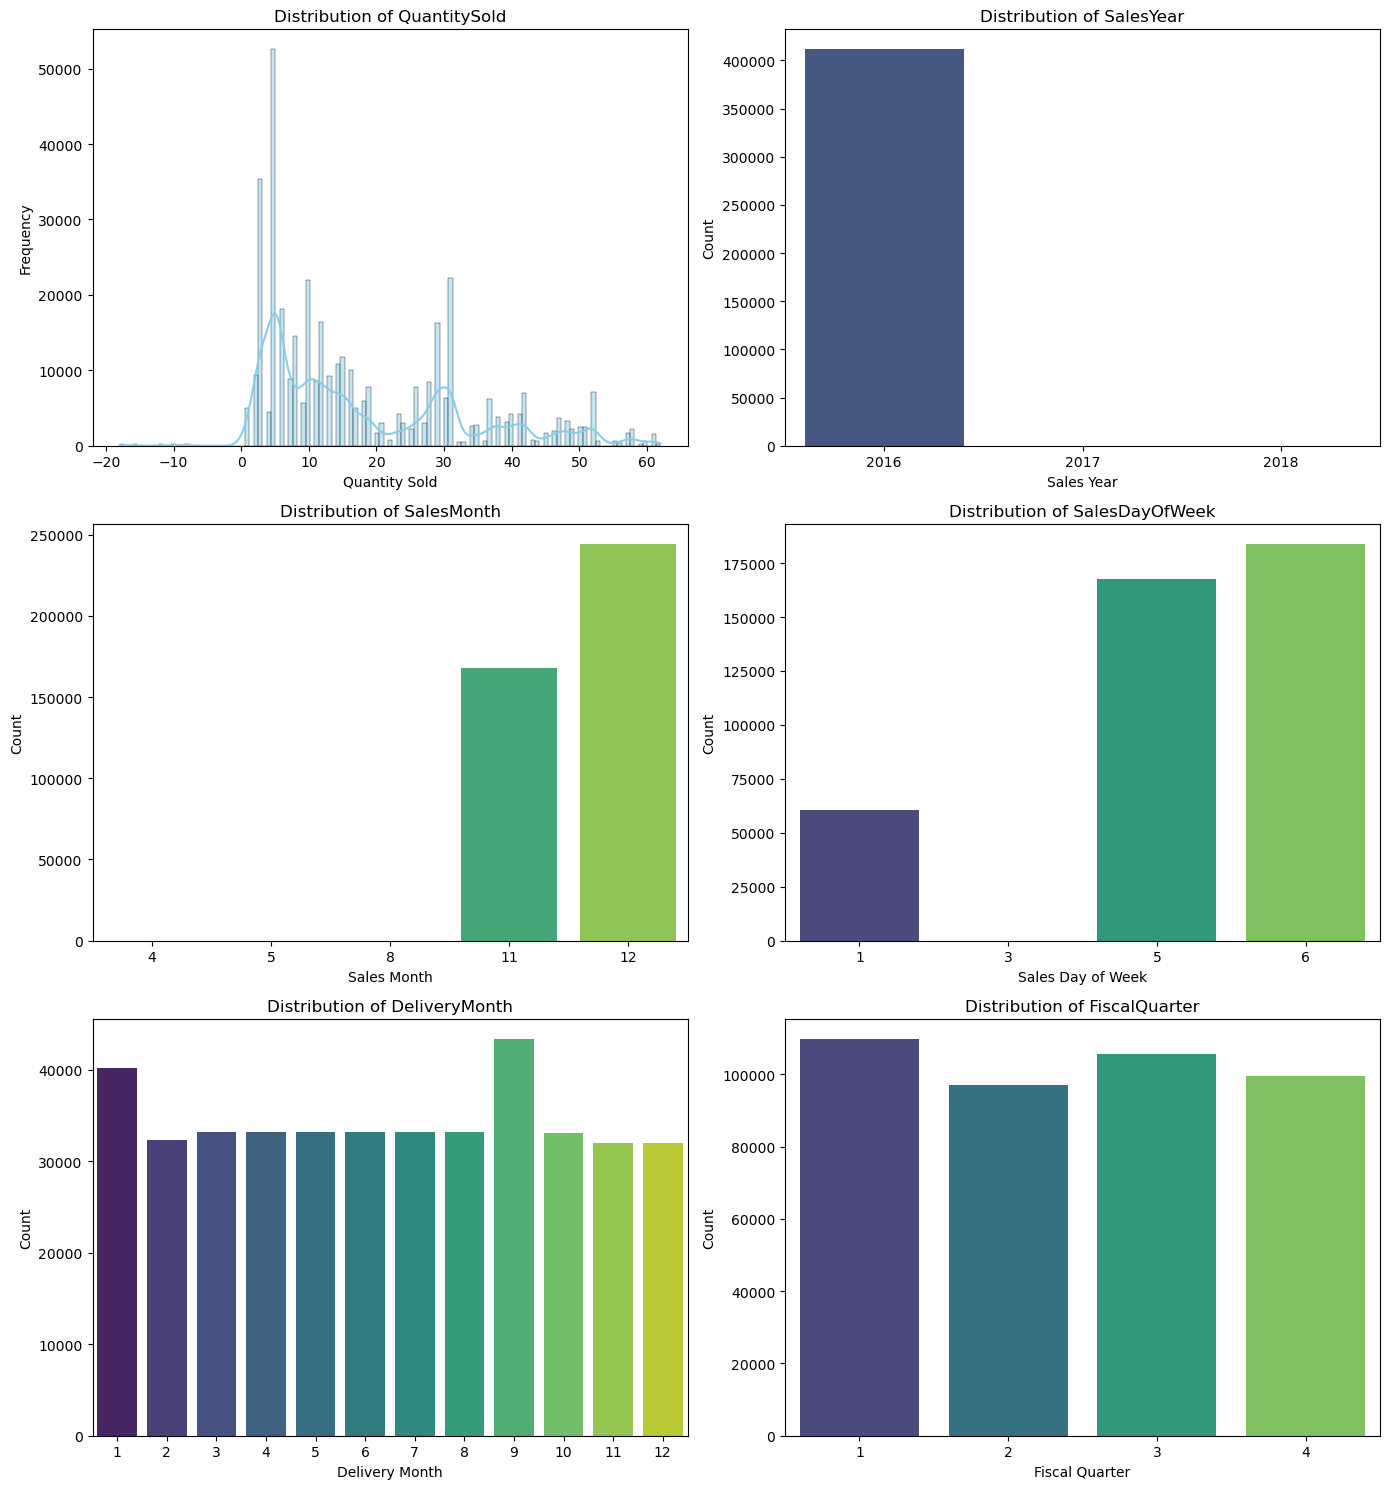

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each column distribution
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# 1. Distribution of QuantitySold (Target Variable)
sns.histplot(dfSales_cleaned['QuantitySold'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title('Distribution of QuantitySold')
axes[0, 0].set_xlabel('Quantity Sold')
axes[0, 0].set_ylabel('Frequency')

# 2. Distribution of SalesYear
sns.countplot(x='SalesYear', data=dfSales_cleaned, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Distribution of SalesYear')
axes[0, 1].set_xlabel('Sales Year')
axes[0, 1].set_ylabel('Count')

# 3. Distribution of SalesMonth
sns.countplot(x='SalesMonth', data=dfSales_cleaned, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Distribution of SalesMonth')
axes[1, 0].set_xlabel('Sales Month')
axes[1, 0].set_ylabel('Count')

# 4. Distribution of SalesDayOfWeek
sns.countplot(x='SalesDayOfWeek', data=dfSales_cleaned, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Distribution of SalesDayOfWeek')
axes[1, 1].set_xlabel('Sales Day of Week')
axes[1, 1].set_ylabel('Count')


plt.tight_layout()
plt.show()


# Generate Dates between 2015-2020


Sample of updated data:
     sale_date  SaleYear  SaleMonth  SaleQuarter  SaleDayOfWeek  \
907 2017-01-21      2017          1            1              5   
908 2016-09-12      2016          9            3              0   
909 2019-12-10      2019         12            4              1   
910 2020-08-24      2020          8            3              0   
911 2015-09-09      2015          9            3              2   

     SaleIsWeekend  SaleWeekOfMonth  
907              1                4  
908              0                3  
909              0                3  
910              0                5  
911              0                2  


C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1910773271.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SaleYear", data=dfSales_generated, ax=axes[0, 0], palette="viridis")
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1910773271.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SaleMonth", data=dfSales_generated, ax=axes[0, 1], palette="viridis")
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1910773271.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="SaleQuarter", data=dfSales_gen

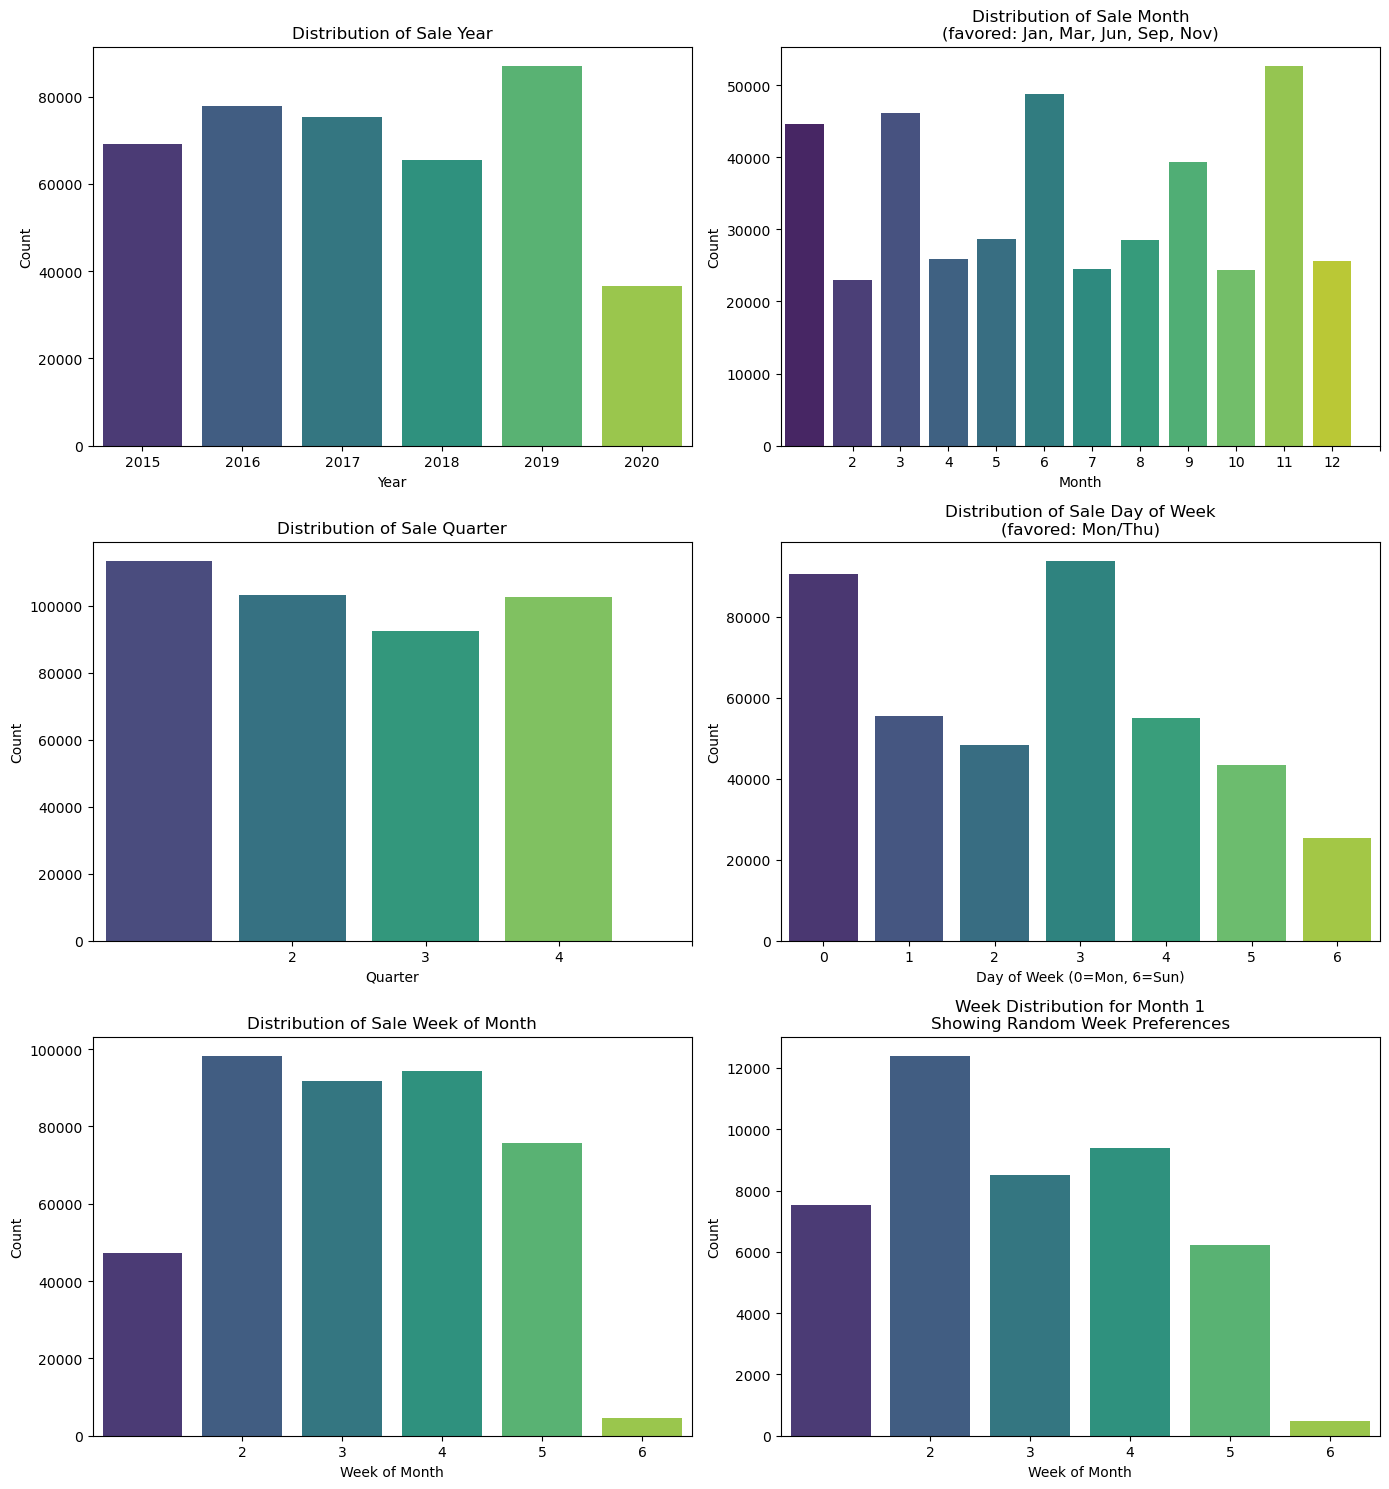


Final Test Dataset:
Date range: 2020-01-01 to 2020-12-31
Shape: (36681, 33)
Percentage of original data: 9.78%


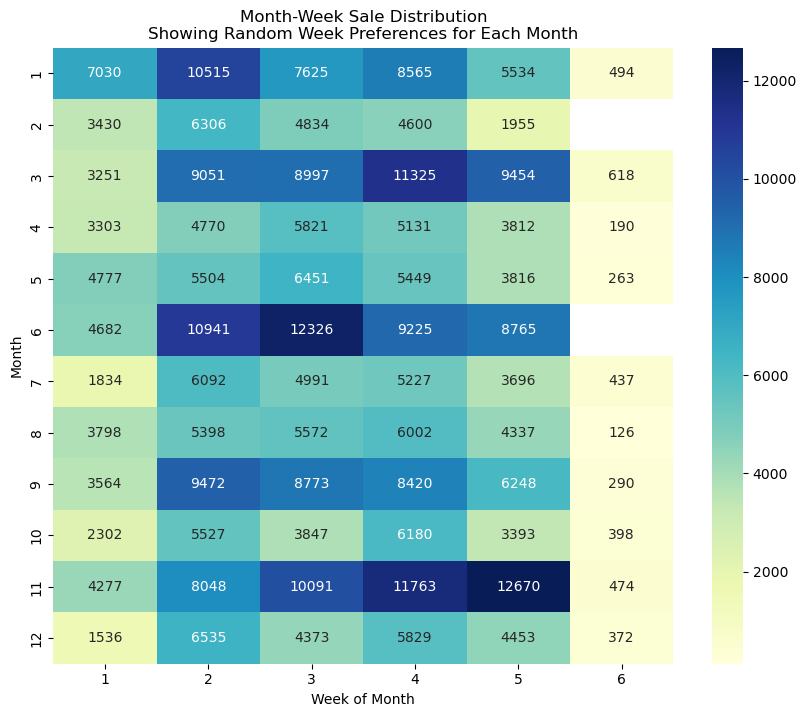

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set seed for reproducibility
np.random.seed(42)

# Use dfSales_cleaned (input DataFrame) and default range.
start_date = pd.to_datetime("2015-01-01")
end_date = pd.to_datetime("2020-12-31")

# Generate full date range based on the defined timeframe
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# Base weights for weekdays and months (common baseline)
base_weekday_weights = {i: 1 for i in range(7)}
base_weekday_weights.update({0: 1.52, 3: 1.68, 5: 0.82, 6: 0.51})  # Favor Monday and Thursday; lower for Sat & Sun

# Instead of using varied base_month_weights, we now use a basic version which will be further adjusted.
basic_month_weights = {i: 1 for i in range(1, 13)}

# Define favored months and a favor coefficient
favored_months = [1, 3, 6, 9, 11]
month_favor = {m: (1.5 if m in favored_months else 1.0) for m in range(1, 13)}

# Define year weights as provided
year_weights = {
    2015: 1.27,
    2016: 1.54,
    2017: 1.35,
    2018: 1.28,
    2019: 1.43,
    2020: 0.65   # Lower weight for testing data
}

# Identify all unique years from the input data (or use default years)
years = list(range(2015, 2021))

# Create year-specific weights with increased variation (±25%) for weekday, and random variation for month and week-of-month.
year_weekday_weights = {}
year_month_weights = {}
year_week_weights_by_month = {}

for year in years:
    # Vary weekday weights by ±25%
    year_weekday_weights[year] = {d: base_weekday_weights[d] * np.random.uniform(0.75, 1.25) for d in range(7)}
    # Vary basic month weights by ±25%
    year_month_weights[year] = {m: basic_month_weights[m] * np.random.uniform(0.75, 1.55) for m in range(1, 13)}
    
    # Generate dynamic week preferences per month with a year-specific seed
    np.random.seed(123 + year)  # Different seed per year for week preferences
    month_week_weights = {}
    for month in range(1, 13):
        base_weights = np.ones(5)  # Assume up to 5 weeks in a month
        num_favored = np.random.choice([1, 2])
        favored_weeks = np.random.choice(5, size=num_favored, replace=False)
        for week in favored_weeks:
            base_weights[week] *= np.random.uniform(1.5, 2.5)
        base_weights /= base_weights.sum()  # Normalize to sum to 1
        month_week_weights[month] = base_weights
    year_week_weights_by_month[year] = month_week_weights

# Function to compute week of month (1-indexed)
def get_week_of_month(date):
    first_day = date.replace(day=1)
    return ((date.day + first_day.weekday()) - 1) // 7 + 1

# Build arrays for each date in date_range using year-specific weights:
year_weights_arr = np.array([year_weights[d.year] for d in date_range])
weekday_weights_arr = np.array([year_weekday_weights[d.year][d.weekday()] for d in date_range])
# For months, multiply the random variation by the constant month favor coefficient.
month_weights_arr = np.array([
    year_month_weights[d.year][d.month] * month_favor[d.month] for d in date_range
])
week_of_month_weights = np.array([
    year_week_weights_by_month[d.year][d.month][min(get_week_of_month(d), 5) - 1] for d in date_range
])

# Combine all weights and normalize
weights = weekday_weights_arr * month_weights_arr * year_weights_arr * week_of_month_weights

# ----- PROMOTIONAL PERIODS / EVENTS -----
# Example 1: Annual Promotion (e.g., Nov 25 - Nov 30 each year)
promo_multiplier = 2.0
promo_mask = np.zeros(len(date_range), dtype=bool)
for year in years:
    promo_start = datetime(year, 11, 25)
    promo_end = datetime(year, 11, 30)
    promo_mask |= ((date_range >= promo_start) & (date_range <= promo_end))

# Example 2: Mid-year Sale (e.g., Jun 15 - Jun 20 each year)
midyear_multiplier = 1.8
midyear_mask = np.zeros(len(date_range), dtype=bool)
for year in years:
    mid_start = datetime(year, 6, 15)
    mid_end = datetime(year, 6, 20)
    midyear_mask |= ((date_range >= mid_start) & (date_range <= mid_end))

# Apply promotional multipliers
weights[promo_mask] *= promo_multiplier
weights[midyear_mask] *= midyear_multiplier

# ----- SPECIAL DATES ADJUSTMENT -----
#   - Black Friday (4th Thursday of November + 1 day)
#   - First Monday of each month
special_dates_mask = np.zeros(len(date_range), dtype=bool)
for year in years:
    nov_first = datetime(year, 11, 1)
    offset_days = (3 - nov_first.weekday()) % 7  # Days until first Thursday
    black_friday = nov_first + pd.Timedelta(days=offset_days + 21 + 1)  # 4th Thursday + 1 day
    idx = np.where(date_range == black_friday)[0]
    if len(idx) > 0:
        special_dates_mask[idx[0]] = True

for date in date_range:
    if date.weekday() == 0 and 1 <= date.day <= 7:  # First Monday of the month
        idx = np.where(date_range == date)[0]
        if len(idx) > 0:
            special_dates_mask[idx[0]] = True

special_day_multiplier = 1.85
weights = np.where(special_dates_mask, weights * special_day_multiplier, weights)

# Normalize final weights
weights /= weights.sum()

# Copy the input DataFrame to generate new sale dates
dfSales_generated = dfSales_cleaned.copy()
random_indices = np.random.choice(np.arange(len(date_range)), size=len(dfSales_generated), p=weights)
dfSales_generated['sale_date'] = pd.Series(date_range[random_indices])

# Update date-related features in the DataFrame
dfSales_generated['SaleYear'] = dfSales_generated['sale_date'].dt.year
dfSales_generated['SaleMonth'] = dfSales_generated['sale_date'].dt.month
dfSales_generated['SaleQuarter'] = dfSales_generated['sale_date'].dt.quarter
dfSales_generated['SaleDayOfWeek'] = dfSales_generated['sale_date'].dt.dayofweek
dfSales_generated['SaleIsWeekend'] = (dfSales_generated['SaleDayOfWeek'] >= 5).astype(int)
dfSales_generated['SaleWeekOfMonth'] = dfSales_generated['sale_date'].apply(get_week_of_month)

# Display sample of updated data
print("\nSample of updated data:")
print(dfSales_generated[['sale_date', 'SaleYear', 'SaleMonth', 'SaleQuarter', 
                          'SaleDayOfWeek', 'SaleIsWeekend', 'SaleWeekOfMonth']].head())

# Visualization with improved formatting
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Year distribution
sns.countplot(x="SaleYear", data=dfSales_generated, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Distribution of Sale Year", fontsize=12)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Count")

# Month distribution
sns.countplot(x="SaleMonth", data=dfSales_generated, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Distribution of Sale Month\n(favored: Jan, Mar, Jun, Sep, Nov)", fontsize=12)
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_xticks(range(1, 13))

# Quarter distribution
sns.countplot(x="SaleQuarter", data=dfSales_generated, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Distribution of Sale Quarter", fontsize=12)
axes[1, 0].set_xlabel("Quarter")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xticks(range(1, 5))

# Day of week distribution
sns.countplot(x="SaleDayOfWeek", data=dfSales_generated, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("Distribution of Sale Day of Week\n(favored: Mon/Thu)", fontsize=12)
axes[1, 1].set_xlabel("Day of Week (0=Mon, 6=Sun)")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xticks(range(7))

# Overall week of month distribution
sns.countplot(x="SaleWeekOfMonth", data=dfSales_generated, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title("Distribution of Sale Week of Month", fontsize=12)
axes[2, 0].set_xlabel("Week of Month")
axes[2, 0].set_ylabel("Count")
axes[2, 0].set_xticks(range(1, 6))

# Plot one example month to show week preferences
example_month = 1  # For example, January
month_data = dfSales_generated[dfSales_generated["SaleMonth"] == example_month]
sns.countplot(x="SaleWeekOfMonth", data=month_data, ax=axes[2, 1], palette="viridis")
axes[2, 1].set_title(f"Week Distribution for Month {example_month}\nShowing Random Week Preferences", fontsize=12)
axes[2, 1].set_xlabel("Week of Month")
axes[2, 1].set_ylabel("Count")
axes[2, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

# ---------------

# Create final test set from the latest year in data (2020)
dfFinalTest = dfSales_generated[dfSales_generated['SaleYear'] == 2020].copy()
# Remove 2020 data from dfSales_generated
dfSales_generated = dfSales_generated[dfSales_generated['SaleYear'] != 2020].copy()


# 
print("\nFinal Test Dataset:")
print(f"Date range: {dfFinalTest['sale_date'].min().date()} to {dfFinalTest['sale_date'].max().date()}")
print(f"Shape: {dfFinalTest.shape}")
print(f"Percentage of original data: {100 * len(dfFinalTest) / len(dfSales_generated):.2f}%")

# Create a heatmap to visualize week preferences across all months
pivot_data = dfSales_generated.pivot_table(
    index='SaleMonth', 
    columns='SaleWeekOfMonth', 
    values='SaleYear',  # We use SaleYear just to count occurrences
    aggfunc='count'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Month-Week Sale Distribution\nShowing Random Week Preferences for Each Month")
plt.xlabel("Week of Month")
plt.ylabel("Month")
plt.show()


In [10]:
dfSales_generated.head()

,CustomerID,CustomerCreditRating,CustomerGroup,DeliveryMode,ProductID,QuantitySold,SalesPrice,TotalSalesAmount,VendorID,QuantityPurchased,InventoryCostPosted,InventoryQuantityChange,DeliveryMonth,DeliveryDayOfWeek,SalesYear,SalesMonth,SalesDayOfWeek,OrderToDeliveryDays,InventoryTurnoverRate,InventoryCostPerUnit,CreditUtilizationRatio,PurchaseToSalesRatio,InventoryEfficiency,FiscalQuarter,IsEndOfFiscalQuarter,MonthlySalesSeasonality,sale_date,SaleYear,SaleMonth,SaleQuarter,SaleDayOfWeek,SaleIsWeekend,SaleWeekOfMonth
907,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-19800.0,-66.0,1,0,2016,11,6,71,-0.242424,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942,2017-01-21,2017,1,1,5,1,4
908,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-19500.0,-65.0,1,0,2016,11,6,71,-0.246154,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942,2016-09-12,2016,9,3,0,0,3
909,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18900.0,-63.0,1,0,2016,11,6,71,-0.253968,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942,2019-12-10,2019,12,4,1,0,3
911,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18300.0,-61.0,1,0,2016,11,6,71,-0.262295,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942,2015-09-09,2015,9,3,2,0,2
912,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18000.0,-60.0,1,0,2016,11,6,71,-0.266667,-300.0,-0.032,-24.375,-0.024615,3,0,0.479942,2015-06-25,2015,6,2,3,0,4


In [11]:
dfFinalTest.head()

,CustomerID,CustomerCreditRating,CustomerGroup,DeliveryMode,ProductID,QuantitySold,SalesPrice,TotalSalesAmount,VendorID,QuantityPurchased,InventoryCostPosted,InventoryQuantityChange,DeliveryMonth,DeliveryDayOfWeek,SalesYear,SalesMonth,SalesDayOfWeek,OrderToDeliveryDays,InventoryTurnoverRate,InventoryCostPerUnit,CreditUtilizationRatio,PurchaseToSalesRatio,InventoryEfficiency,FiscalQuarter,IsEndOfFiscalQuarter,MonthlySalesSeasonality,sale_date,SaleYear,SaleMonth,SaleQuarter,SaleDayOfWeek,SaleIsWeekend,SaleWeekOfMonth
910,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-18600.0,-62.0,1,0,2016,11,6,71,-0.258065,-300.000000,-0.032,-24.375,-0.024615,3,0,0.479942,2020-08-24,2020,8,3,0,0,5
916,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-16800.0,-56.0,1,0,2016,11,6,71,-0.285714,-300.000000,-0.032,-24.375,-0.024615,3,0,0.479942,2020-01-08,2020,1,1,2,0,2
922,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-15000.0,-50.0,1,0,2016,11,6,71,-0.320000,-300.000000,-0.032,-24.375,-0.024615,3,0,0.479942,2020-11-02,2020,11,4,0,0,2
950,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-3600.0,-12.0,1,0,2016,11,6,71,-1.333333,-300.000000,-0.032,-24.375,-0.024615,3,0,0.479942,2020-04-08,2020,4,2,2,0,2
970,10.598654,1,15.157883,18.288353,21.661157,-16.0,500.0,-8000.0,20.729883,650.0,-6720.0,-61.0,1,0,2016,11,6,71,-0.262295,-110.163934,-0.032,-24.375,-0.024615,3,0,0.479942,2020-05-16,2020,5,2,5,1,3


In [12]:
dfSales_generated.drop(columns=['SalesYear',	'SalesMonth',	'SalesDayOfWeek'], inplace=True)
dfFinalTest.drop(columns=['SalesYear',	'SalesMonth',	'SalesDayOfWeek'], inplace=True)


# Split Data in 70-20-10 approach

In [13]:
# First, sort the data by sale_date
dfSales_generated = dfSales_generated.sort_values(by="sale_date")

# Compute sizes
n_total = len(dfSales_generated)
n_train = int(0.7 * n_total)
n_val = int(0.2 * n_total)

# Split the data
train_df = dfSales_generated.iloc[:n_train]
val_df = dfSales_generated.iloc[n_train:n_train + n_val]
test_df = dfSales_generated.iloc[n_train + n_val:]

print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

print("Training data date range:", train_df['sale_date'].min(), "to", train_df['sale_date'].max())
print("Validation data date range:", val_df['sale_date'].min(), "to", val_df['sale_date'].max())
print("Test data date range:", test_df['sale_date'].min(), "to", test_df['sale_date'].max())
dfSales_generated.drop(columns=['sale_date'], inplace=True)
dfFinalTest.drop(columns=['sale_date'], inplace=True)

Training set shape: (262608, 30)
Validation set shape: (75031, 30)
Test set shape: (37516, 30)
Training data date range: 2015-01-01 00:00:00 to 2018-07-26 00:00:00
Validation data date range: 2018-07-26 00:00:00 to 2019-07-25 00:00:00
Test data date range: 2019-07-25 00:00:00 to 2019-12-31 00:00:00


In [14]:
print(dfFinalTest.columns)

Index(['CustomerID', 'CustomerCreditRating', 'CustomerGroup', 'DeliveryMode',
       'ProductID', 'QuantitySold', 'SalesPrice', 'TotalSalesAmount',
       'VendorID', 'QuantityPurchased', 'InventoryCostPosted',
       'InventoryQuantityChange', 'DeliveryMonth', 'DeliveryDayOfWeek',
       'OrderToDeliveryDays', 'InventoryTurnoverRate', 'InventoryCostPerUnit',
       'CreditUtilizationRatio', 'PurchaseToSalesRatio', 'InventoryEfficiency',
       'FiscalQuarter', 'IsEndOfFiscalQuarter', 'MonthlySalesSeasonality',
       'SaleYear', 'SaleMonth', 'SaleQuarter', 'SaleDayOfWeek',
       'SaleIsWeekend', 'SaleWeekOfMonth'],
      dtype='object')


In [15]:
print(dfSales_generated.columns)


Index(['CustomerID', 'CustomerCreditRating', 'CustomerGroup', 'DeliveryMode',
       'ProductID', 'QuantitySold', 'SalesPrice', 'TotalSalesAmount',
       'VendorID', 'QuantityPurchased', 'InventoryCostPosted',
       'InventoryQuantityChange', 'DeliveryMonth', 'DeliveryDayOfWeek',
       'OrderToDeliveryDays', 'InventoryTurnoverRate', 'InventoryCostPerUnit',
       'CreditUtilizationRatio', 'PurchaseToSalesRatio', 'InventoryEfficiency',
       'FiscalQuarter', 'IsEndOfFiscalQuarter', 'MonthlySalesSeasonality',
       'SaleYear', 'SaleMonth', 'SaleQuarter', 'SaleDayOfWeek',
       'SaleIsWeekend', 'SaleWeekOfMonth'],
      dtype='object')


In [16]:
dfSales_generated.head()

,CustomerID,CustomerCreditRating,CustomerGroup,DeliveryMode,ProductID,QuantitySold,SalesPrice,TotalSalesAmount,VendorID,QuantityPurchased,InventoryCostPosted,InventoryQuantityChange,DeliveryMonth,DeliveryDayOfWeek,OrderToDeliveryDays,InventoryTurnoverRate,InventoryCostPerUnit,CreditUtilizationRatio,PurchaseToSalesRatio,InventoryEfficiency,FiscalQuarter,IsEndOfFiscalQuarter,MonthlySalesSeasonality,SaleYear,SaleMonth,SaleQuarter,SaleDayOfWeek,SaleIsWeekend,SaleWeekOfMonth
128789,43.098829,0,15.157883,18.288353,32.247887,52.0,350.0,18200.0,20.729883,625.0,-6880.0,-43.0,6,0,-146,1.209302,-160.0,0.036400,5.494505,0.0832,4,1,0.855815,2015,1,1,3,0,1
350418,43.098829,0,15.157883,18.288353,15.032258,38.0,450.0,17100.0,20.729883,2.0,-640.0,-2.0,4,0,-608,19.000000,-320.0,0.034200,0.037427,19.0000,4,0,0.839946,2015,1,1,3,0,1
16315,24.865607,0,15.157883,18.288353,32.247887,37.0,350.0,12950.0,20.729883,625.0,-9280.0,-58.0,12,3,5,0.637931,-160.0,0.032375,7.722008,0.0592,2,1,0.931734,2015,1,1,3,0,1
36598,35.616637,0,19.603753,18.288353,32.247887,58.0,350.0,20300.0,20.729883,625.0,-6080.0,-38.0,11,1,2,1.526316,-160.0,0.040600,4.926108,0.0928,2,0,0.792023,2015,1,1,3,0,1
232363,11.622932,0,19.603753,18.288353,32.247887,25.0,350.0,8750.0,20.729883,1.0,-6080.0,-38.0,11,5,-393,0.657895,-160.0,0.025000,0.018286,25.0000,2,0,0.792023,2015,1,1,3,0,1


# Prepare Features and Target for Modeling

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define target column
target_column = "QuantitySold"

# Identify numerical features (already encoded)
numerical_features = [
    "SalesPrice", "TotalSalesAmount", "QuantityPurchased", "InventoryCostPosted",
    "InventoryQuantityChange", "OrderToDeliveryDays", "InventoryTurnoverRate",
    "InventoryCostPerUnit", "CreditUtilizationRatio", "InventoryEfficiency",
    "MonthlySalesSeasonality"
]

# Time-based features
time_features = ["SaleYear", "SaleMonth", "SaleQuarter", "SaleDayOfWeek", "SaleWeekOfMonth"]

# Categorical features to be added
categorical_features = [
    "CustomerID", "CustomerCreditRating", "CustomerGroup", "DeliveryMode",
    "ProductID", "VendorID", "FiscalQuarter", "IsEndOfFiscalQuarter", "SaleIsWeekend"
]

# Final feature list (including both numerical and categorical features)
feature_columns = numerical_features + time_features + categorical_features

# Ensure all selected features exist in the dataset
feature_columns = [col for col in feature_columns if col in train_df.columns]

# Print selected features
print(f"Features used for modeling: {feature_columns}")

# Extract features (X) and target (y) for each split
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_val, y_val = val_df[feature_columns], val_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Print dataset shapes
print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nScaling applied to numerical features.")

# Print sample of processed data
print("\nSample of processed training data:")
print(X_train.head())

print("\nFeature engineering complete. Data ready for predictive modeling.")


Features used for modeling: ['SalesPrice', 'TotalSalesAmount', 'QuantityPurchased', 'InventoryCostPosted', 'InventoryQuantityChange', 'OrderToDeliveryDays', 'InventoryTurnoverRate', 'InventoryCostPerUnit', 'CreditUtilizationRatio', 'InventoryEfficiency', 'MonthlySalesSeasonality', 'SaleYear', 'SaleMonth', 'SaleQuarter', 'SaleDayOfWeek', 'SaleWeekOfMonth', 'CustomerID', 'CustomerCreditRating', 'CustomerGroup', 'DeliveryMode', 'ProductID', 'VendorID', 'FiscalQuarter', 'IsEndOfFiscalQuarter', 'SaleIsWeekend']

X_train shape: (262608, 25), y_train shape: (262608,)
X_val shape: (75031, 25), y_val shape: (75031,)
X_test shape: (37516, 25), y_test shape: (37516,)

Scaling applied to numerical features.

Sample of processed training data:
        SalesPrice  TotalSalesAmount  QuantityPurchased  InventoryCostPosted  \
128789   -0.686146          0.471888           1.399136             0.181438   
350418   -0.557271          0.379672          -0.921204             1.102593   
16315    -0.686146 

C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1929932159.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1929932159.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numerical_features] = scaler.transform(X_val[numerical_features])
C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\1929932159.py:42: SettingWithCopyWarning: 
A value is trying to 

## Preparation for DfFinalTest

In [18]:
# Extract features (same ones used in training)
X_final_test = dfFinalTest[feature_columns]

# Apply scaling using the already fitted scaler
X_final_test[numerical_features] = scaler.transform(X_final_test[numerical_features])


C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_9484\2101537339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final_test[numerical_features] = scaler.transform(X_final_test[numerical_features])


# 📌 Models training and choosing

## 1️⃣ Linear Regression (Baseline Model)

Training Linear Regression Model...

Linear Regression Model Results:
Validation R² Score: 0.8390
Test R² Score: 0.8402
Validation RMSE: 6.0463
Test RMSE: 6.0132
Validation MAE: 4.4926
Test MAE: 4.4609


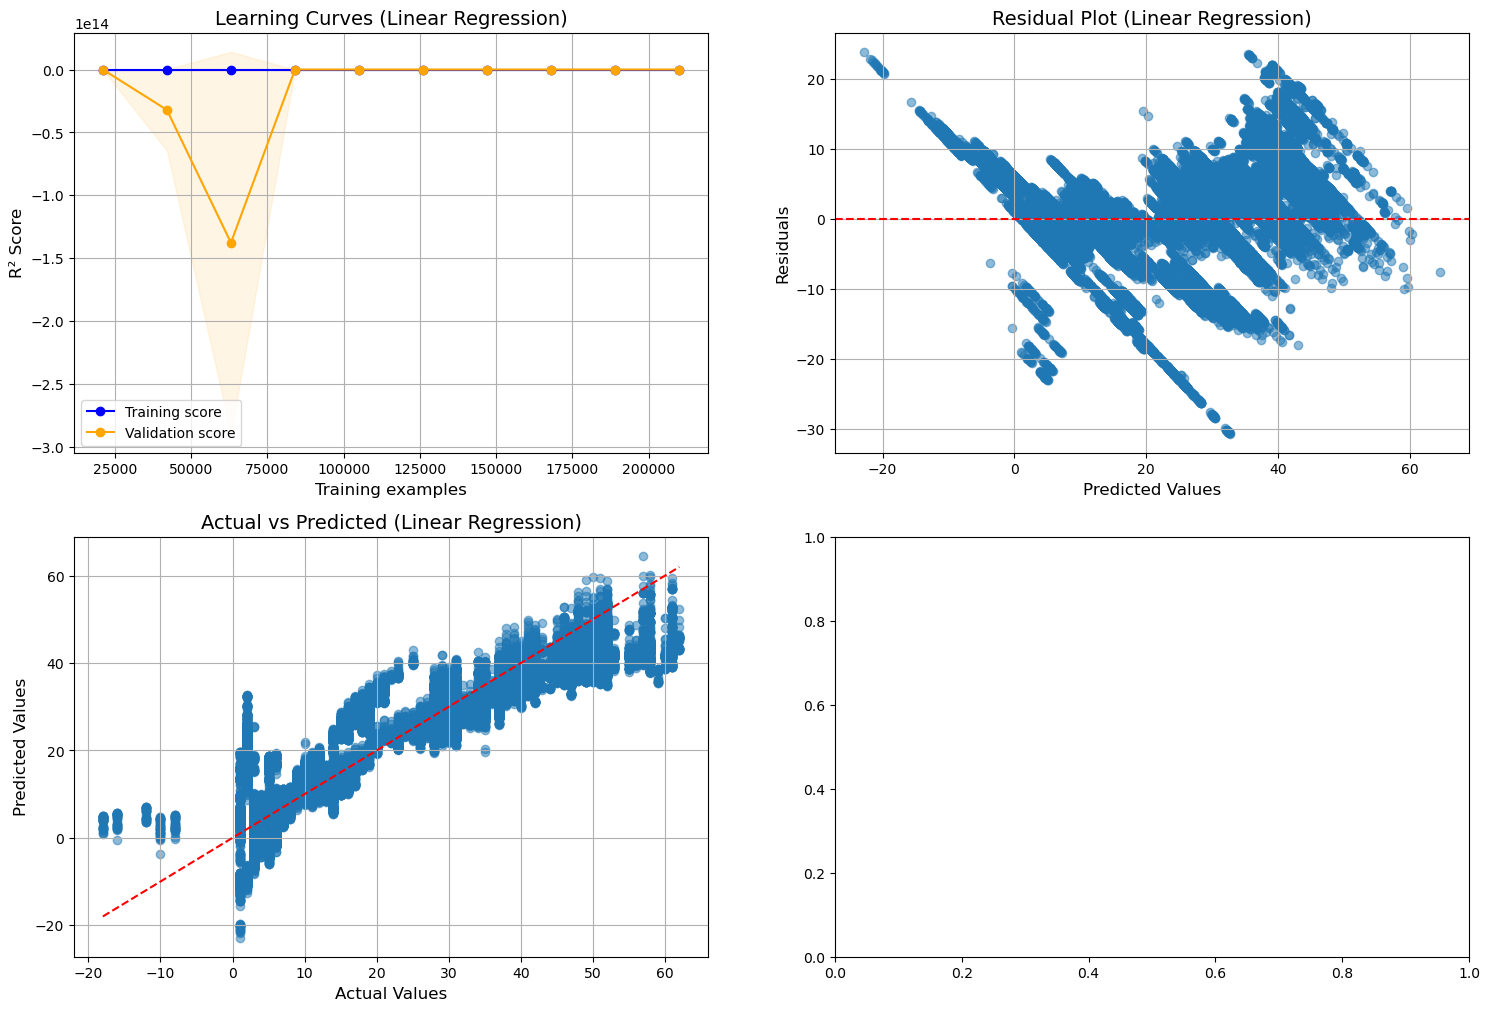

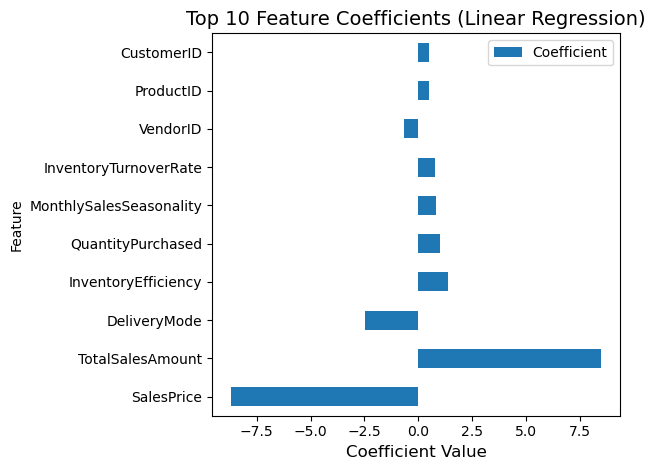

In [19]:
# Linear Regression Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# Initialize the model
lr_model = LinearRegression()

# Train the model
print("Training Linear Regression Model...")
lr_model.fit(X_train, y_train)

# Make predictions on validation and test sets
y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate metrics
lr_val_r2 = r2_score(y_val, y_val_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_val_mae = mean_absolute_error(y_val, y_val_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)

# Print results
print("\nLinear Regression Model Results:")
print(f"Validation R² Score: {lr_val_r2:.4f}")
print(f"Test R² Score: {lr_test_r2:.4f}")
print(f"Validation RMSE: {lr_val_rmse:.4f}")
print(f"Test RMSE: {lr_test_rmse:.4f}")
print(f"Validation MAE: {lr_val_mae:.4f}")
print(f"Test MAE: {lr_test_mae:.4f}")

# Feature coefficients
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Create figure with subplots
plt.figure(figsize=(18, 12))

# Plot 1: Learning curves
plt.subplot(2, 2, 1)
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="orange", label="Validation score")
plt.title("Learning Curves (Linear Regression)", fontsize=14)
plt.xlabel("Training examples", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

# Plot 2: Residuals
plt.subplot(2, 2, 2)
residuals = y_val - y_val_pred_lr
plt.scatter(y_val_pred_lr, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (Linear Regression)", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)

# Plot 3: Actual vs Predicted
plt.subplot(2, 2, 3)
plt.scatter(y_val, y_val_pred_lr, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title("Actual vs Predicted (Linear Regression)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.grid(True)

# Plot 4: Feature Coefficients
plt.subplot(2, 2, 4)
coefficients.head(10).plot(kind='barh', x='Feature', y='Coefficient')
plt.title("Top 10 Feature Coefficients (Linear Regression)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.tight_layout()
plt.show()

# Store results for comparison
lr_results = {
    'Model': 'Linear Regression',
    'Val R²': lr_val_r2,
    'Test R²': lr_test_r2,
    'Val RMSE': lr_val_rmse,
    'Test RMSE': lr_test_rmse,
    'Val MAE': lr_val_mae,
    'Test MAE': lr_test_mae
}


## 2️⃣ Random Forest Regressor

Training Random Forest Model...

Random Forest Model Results:
Validation R² Score: 0.9991
Test R² Score: 0.9990
Validation RMSE: 0.4602
Test RMSE: 0.4808
Validation MAE: 0.1953
Test MAE: 0.1968


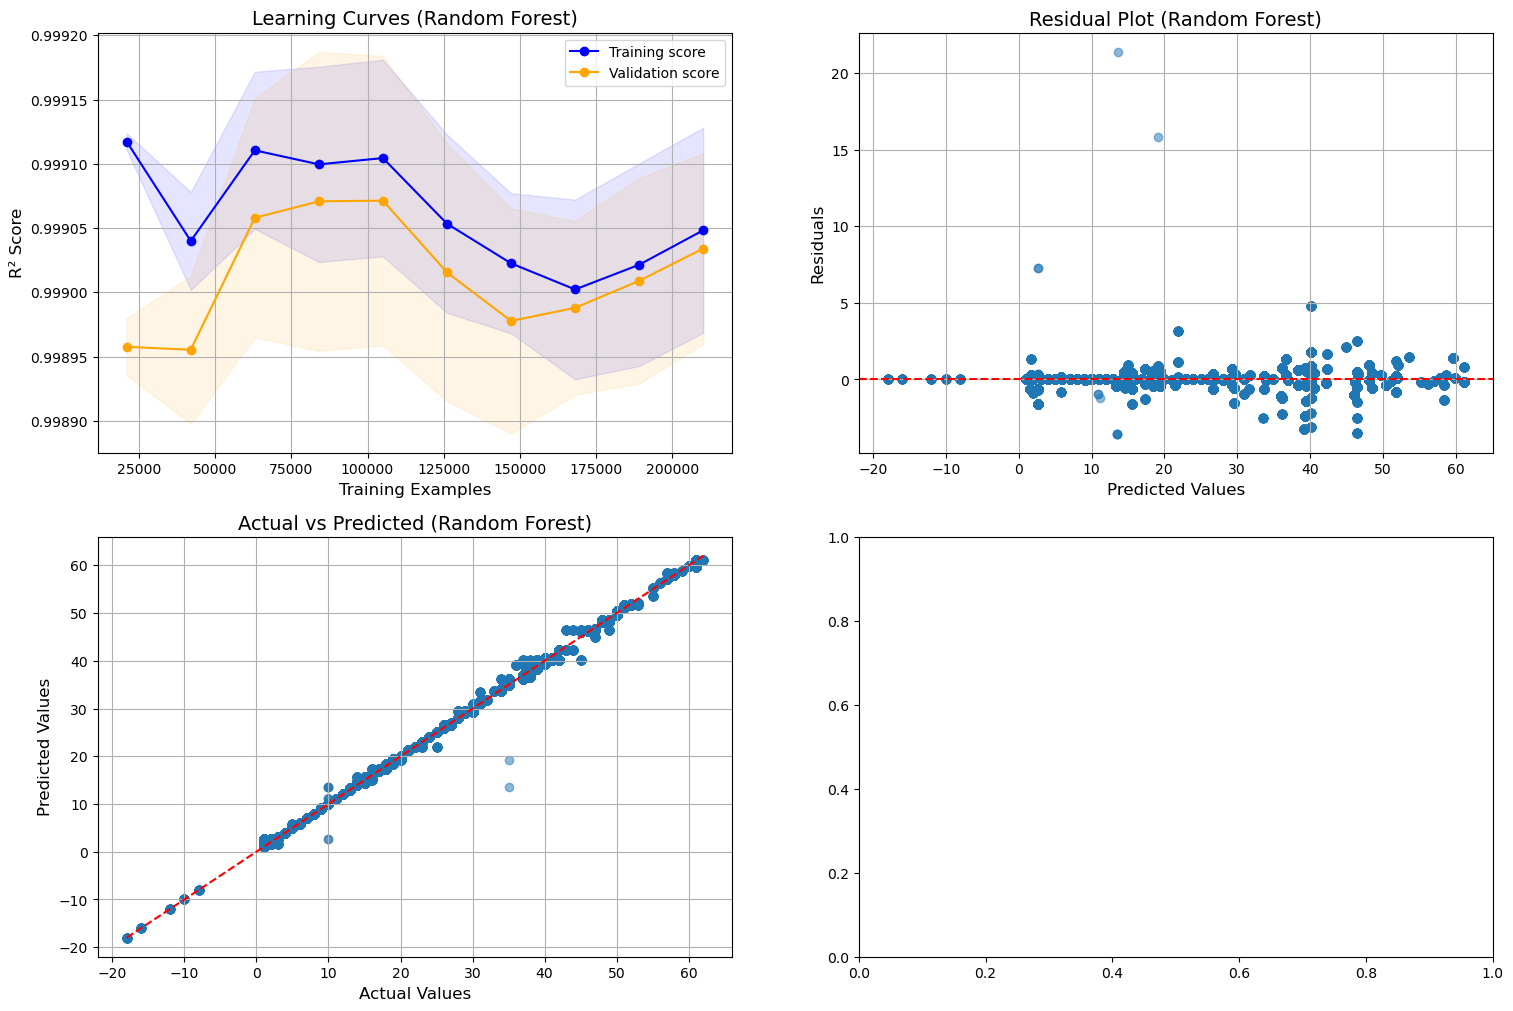

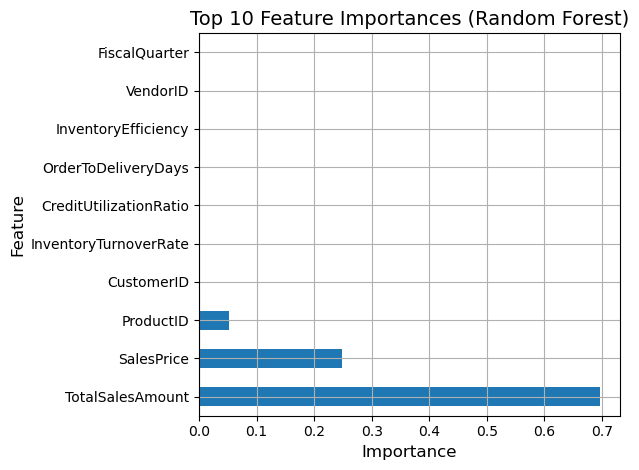

In [20]:
# Random Forest Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# Initialize the model with hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=70,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Train the model
print("Training Random Forest Model...")
rf_model.fit(X_train, y_train)

# Make predictions on validation and test sets
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)


# Calculate metrics
rf_val_r2 = r2_score(y_val, y_val_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_val_mae = mean_absolute_error(y_val, y_val_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)


# Print results
print("\nRandom Forest Model Results:")
print(f"Validation R² Score: {rf_val_r2:.4f}")
print(f"Test R² Score: {rf_test_r2:.4f}")
print(f"Validation RMSE: {rf_val_rmse:.4f}")
print(f"Test RMSE: {rf_test_rmse:.4f}")
print(f"Validation MAE: {rf_val_mae:.4f}")
print(f"Test MAE: {rf_test_mae:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Create figure with subplots
plt.figure(figsize=(18, 12))

# Plot 1: Learning curves
plt.subplot(2, 2, 1)
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="orange", label="Validation score")
plt.title("Learning Curves (Random Forest)", fontsize=14)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

# Plot 2: Residuals
plt.subplot(2, 2, 2)
residuals = y_val - y_val_pred_rf
plt.scatter(y_val_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (Random Forest)", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)

# Plot 3: Actual vs Predicted
plt.subplot(2, 2, 3)
plt.scatter(y_val, y_val_pred_rf, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title("Actual vs Predicted (Random Forest)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.grid(True)

# Plot 4: Feature Importance
plt.subplot(2, 2, 4)
feature_importance.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Store results for comparison
rf_results = {
    'Model': 'Random Forest',
    'Val R²': rf_val_r2,
    'Test R²': rf_test_r2,
    'Val RMSE': rf_val_rmse,
    'Test RMSE': rf_test_rmse,
    'Val MAE': rf_val_mae,
    'Test MAE': rf_test_mae,
}


## 3️⃣ XGBoost Regressor

Training XGBoost Model...


C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_3236\1994005742.py:93: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)  # Corrected subplot position


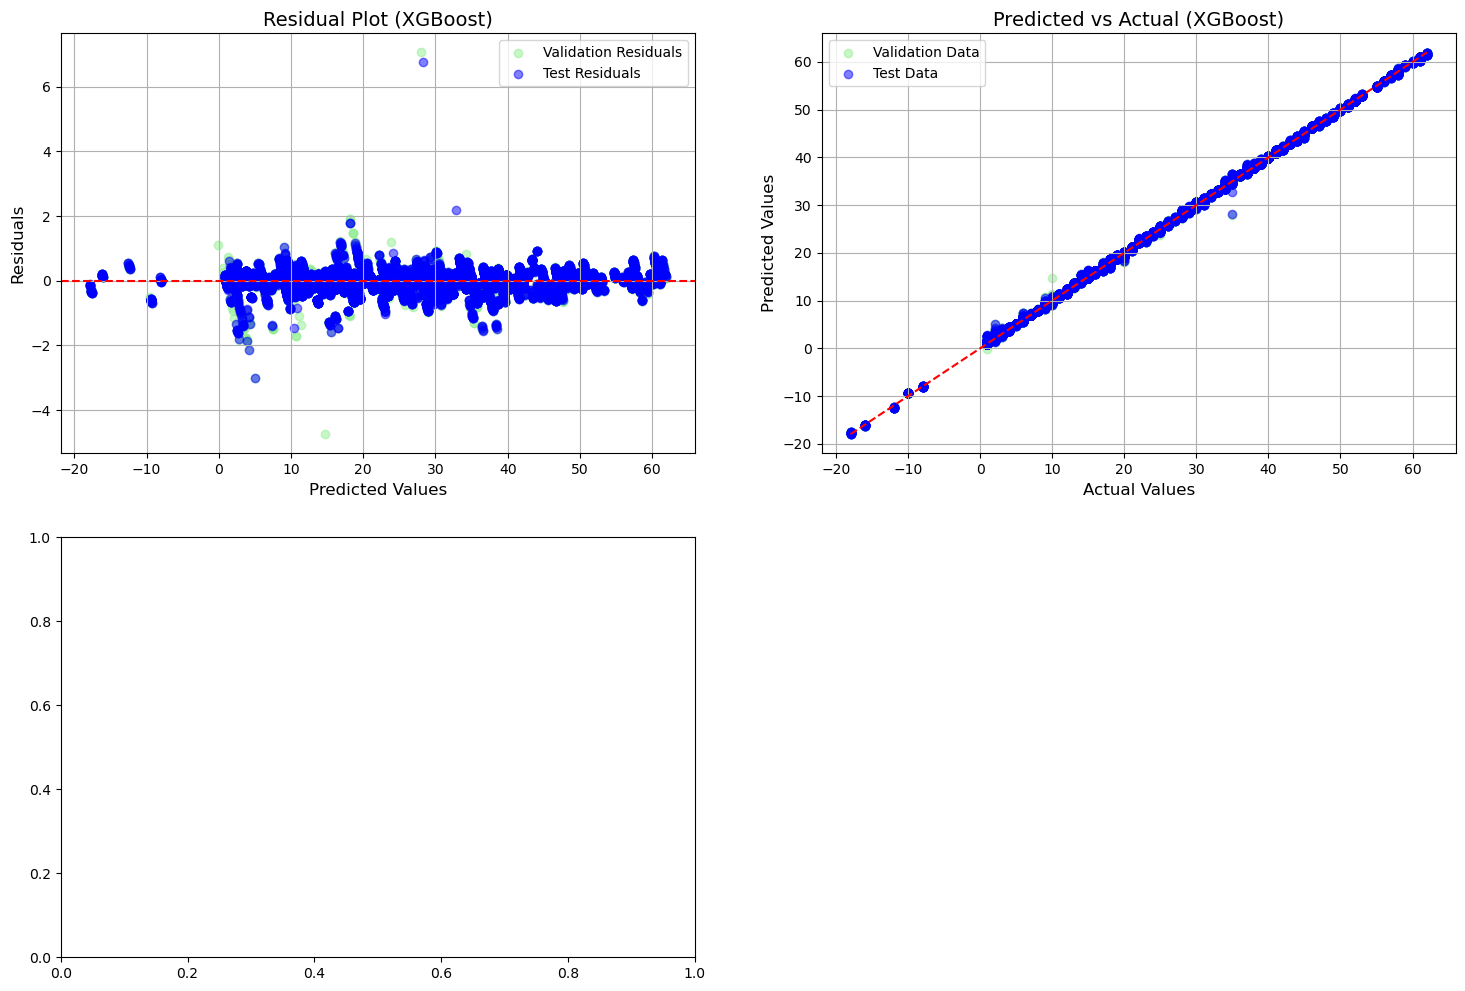

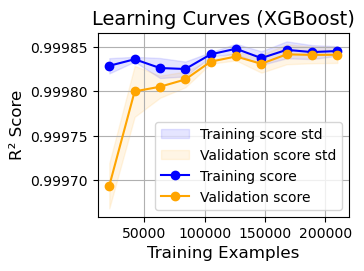


XGBoost Model Results:
Validation R² Score: 0.9998
Test R² Score: 0.9998
Validation RMSE: 0.1888
Test RMSE: 0.1895
Validation MAE: 0.1166
Test MAE: 0.1157


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# --- Data preparation ---
# Use the train, validation, and test sets from the previous split
X_train, y_train = train_df[feature_columns], train_df[target_column]
X_val, y_val = val_df[feature_columns], val_df[target_column]
X_test, y_test = test_df[feature_columns], test_df[target_column]

# --- Model initialization ---
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# --- Training ---
print("Training XGBoost Model...")
xgb_model.fit(X_train, y_train)

# --- Predictions ---
y_val_pred_xgb = xgb_model.predict(X_val)
y_test_pred_xgb = xgb_model.predict(X_test)

# --- Metrics ---
xgb_val_r2 = r2_score(y_val, y_val_pred_xgb)
xgb_test_r2 = r2_score(y_test, y_test_pred_xgb)
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
xgb_val_mae = mean_absolute_error(y_val, y_val_pred_xgb)
xgb_test_mae = mean_absolute_error(y_test, y_test_pred_xgb)

# --- Feature importance ---
feature_importance = pd.DataFrame({
    'Feature': feature_columns,  # Make sure 'feature_columns' is defined
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# --- Plotting ---
plt.figure(figsize=(18, 12))

# Plot 1: Residuals (with test points in light green)
plt.subplot(2, 2, 1)
residuals = y_val - y_val_pred_xgb
plt.scatter(y_val_pred_xgb, residuals, alpha=0.5, color='lightgreen', label="Validation Residuals")
plt.scatter(y_test_pred_xgb, y_test - y_test_pred_xgb, alpha=0.5, color='blue', label="Test Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (XGBoost)", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Plot 2: Predicted vs Actual (Validation vs Predictions)
plt.subplot(2, 2, 2)
plt.scatter(y_val, y_val_pred_xgb, alpha=0.5, color='lightgreen', label="Validation Data")
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5, color='blue', label="Test Data")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual (XGBoost)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Plot 3: Feature Importance
plt.subplot(2, 2, 3)
feature_importance.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importance (XGBoost)", fontsize=14)
plt.xlabel("Importance", fontsize=12)

#Plot 4 : learning curve 
# --- Learning Curve ---
train_sizes, train_scores, valid_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
)

# Calculer les moyennes et écarts types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# --- Plot 4: Learning Curve ---
plt.subplot(2, 2, 4)  # Corrected subplot position

# Fill between for training and validation scores
plt.fill_between(train_sizes, train_mean - train_std, 
                 train_mean + train_std, alpha=0.1, color="blue", label="Training score std")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="orange", label="Validation score std")

# Plot the training and validation scores
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="orange", label="Validation score")

# Title and labels
plt.title("Learning Curves (XGBoost)", fontsize=14)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("R² Score", fontsize=12)

# Adding grid and legend
plt.legend(loc="best")
plt.grid(True)

##############
# Show all plots
plt.tight_layout()
plt.show()

# --- Print results ---
print("\nXGBoost Model Results:")
print(f"Validation R² Score: {xgb_val_r2:.4f}")
print(f"Test R² Score: {xgb_test_r2:.4f}")
print(f"Validation RMSE: {xgb_val_rmse:.4f}")
print(f"Test RMSE: {xgb_test_rmse:.4f}")
print(f"Validation MAE: {xgb_val_mae:.4f}")
print(f"Test MAE: {xgb_test_mae:.4f}")

# --- Store results for comparison ---
xgb_results = {
    'Model': 'XGBoost',
    'Val R²': xgb_val_r2,
    'Test R²': xgb_test_r2,
    'Val RMSE': xgb_val_rmse,
    'Test RMSE': xgb_test_rmse,
    'Val MAE': xgb_val_mae,
    'Test MAE': xgb_test_mae
}


## Light GBM Model

Training LightGBM Model...
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's rmse: 0.556455	valid's rmse: 0.558353


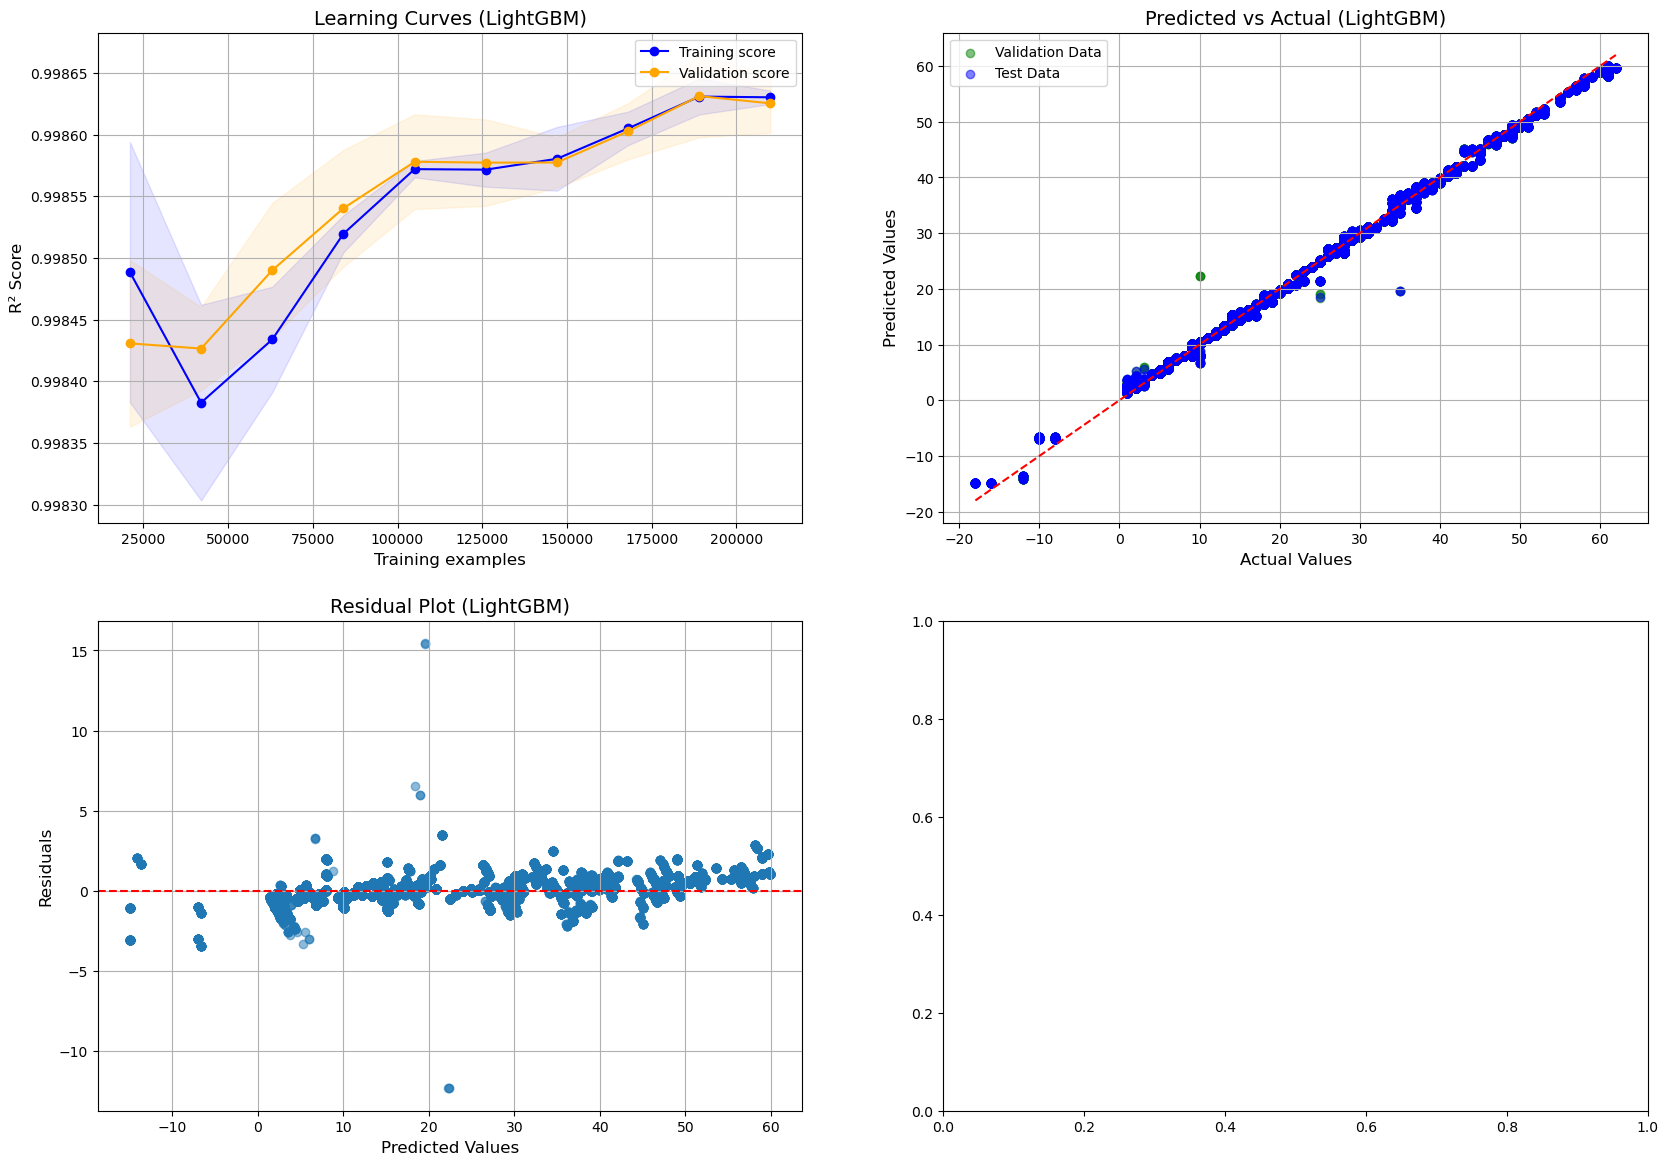

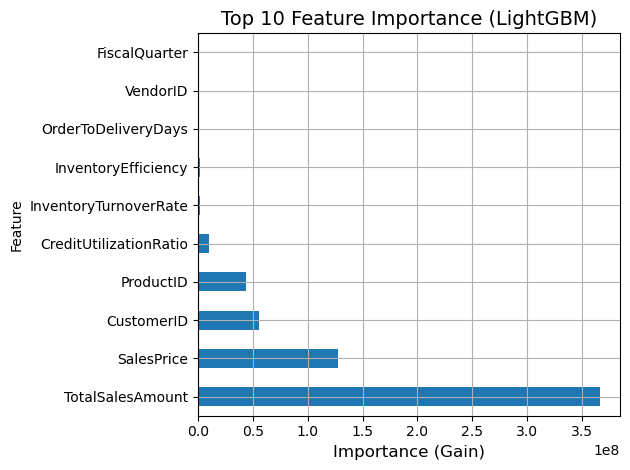


LightGBM Model Results:
Validation R² Score: 0.9986
Validation Adjusted R² Score: 0.9986
Test R² Score: 0.9986
Test Adjusted R² Score: 0.9986
Validation RMSE: 0.5584
Test RMSE: 0.5578
Validation MAE: 0.3975
Test MAE: 0.3965


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# --- Data Preparation ---
# Create LightGBM datasets for training and validation
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

evals_result = {}

# --- Model Parameters ---
# Set the parameters for LightGBM model
params = {
    'boosting_type': 'gbdt',          # Gradient Boosting Decision Tree method
    'objective': 'regression',        # Set the objective as regression
    'metric': 'rmse',                 # Set the evaluation metric to RMSE (Root Mean Squared Error)
    'num_leaves': 18,                 # Number of leaves in one tree
    'learning_rate': 0.04,            # Step size at each iteration
    'feature_fraction': 0.9,          # Fraction of features to be used for training
    'bagging_fraction': 0.8,          # Fraction of data to be used for training
    'bagging_freq': 5,                # Frequency of bagging
    'verbose': -1                     # Suppress the LightGBM logs
}

# --- Model Training ---
# Train the model using the LightGBM dataset
print("Training LightGBM Model...")
lgb_model = lgb.train(
    params,                          # Model parameters
    lgb_train,                        # Training dataset
    num_boost_round=100,             # Number of boosting rounds (iterations)
    valid_sets=[lgb_train, lgb_val],  # Validation datasets (train and validation)
    valid_names=['train', 'valid'],  # Names of the validation sets
    callbacks=[                      # Early stopping callback to prevent overfitting
        lgb.early_stopping(stopping_rounds=100),
        lgb.record_evaluation(evals_result)
    ]
)

# --- Model Predictions ---
# Predict on the validation and test datasets
y_val_pred_lgb = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
y_test_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# --- Metrics Calculation ---
# Calculate R², RMSE, and MAE for the validation and test predictions
lgb_val_r2 = r2_score(y_val, y_val_pred_lgb)
lgb_test_r2 = r2_score(y_test, y_test_pred_lgb)

# Calculate Adjusted R²
n_val = X_val.shape[0]  # number of validation samples
p_val = X_val.shape[1]  # number of features
lgb_val_r2_adj = 1 - (1 - lgb_val_r2) * (n_val - 1) / (n_val - p_val - 1)

n_test = X_test.shape[0]  # number of test samples
p_test = X_test.shape[1]  # same number of features
lgb_test_r2_adj = 1 - (1 - lgb_test_r2) * (n_test - 1) / (n_test - p_test - 1)


lgb_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_lgb))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lgb))
lgb_val_mae = mean_absolute_error(y_val, y_val_pred_lgb)
lgb_test_mae = mean_absolute_error(y_test, y_test_pred_lgb)

# --- Feature Importance ---
# Get the feature importance based on the 'gain' metric
feature_importance = pd.DataFrame({
    'Feature': feature_columns,  # Ensure 'feature_columns' is defined
    'Importance': lgb_model.feature_importance(importance_type='gain')
}).sort_values('Importance', ascending=False)

# --- Visualization ---
plt.figure(figsize=(20, 14))

# Plot 1: Learning Curve (Training vs Validation scores over training size)
plt.subplot(2, 2, 1)
train_sizes, train_scores, val_scores = learning_curve(
    lgb.LGBMRegressor(**params), X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve with confidence intervals
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="orange", label="Validation score")
plt.title("Learning Curves (LightGBM)", fontsize=14)
plt.xlabel("Training examples", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

# Plot 2: Actual vs Predicted (Validation and Test datasets)
plt.subplot(2, 2, 2)
plt.scatter(y_val, y_val_pred_lgb, alpha=0.5, color='green', label="Validation Data")
plt.scatter(y_test, y_test_pred_lgb, alpha=0.5, color='blue', label="Test Data")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title("Predicted vs Actual (LightGBM)", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(True)

# Plot 3: Residual Plot (Validation data)
plt.subplot(2, 2, 3)
residuals = y_val - y_val_pred_lgb
plt.scatter(y_val_pred_lgb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (LightGBM)", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)

# Plot 4: Top 10 Feature Importance (Bar chart)
plt.subplot(2, 2, 4)
feature_importance.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importance (LightGBM)", fontsize=14)
plt.xlabel("Importance (Gain)", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Results ---
# Print model evaluation results
print("\nLightGBM Model Results:")
print(f"Validation R² Score: {lgb_val_r2:.4f}")
print(f"Validation Adjusted R² Score: {lgb_val_r2_adj:.4f}")
print(f"Test R² Score: {lgb_test_r2:.4f}")
print(f"Test Adjusted R² Score: {lgb_test_r2_adj:.4f}")
print(f"Validation RMSE: {lgb_val_rmse:.4f}")
print(f"Test RMSE: {lgb_test_rmse:.4f}")
print(f"Validation MAE: {lgb_val_mae:.4f}")
print(f"Test MAE: {lgb_test_mae:.4f}")


# --- Store Results for Comparison ---
lgb_results = {
    'Model': 'LightGBM',
    'Val R²': lgb_val_r2,
    'Test R²': lgb_test_r2,
    'Val RMSE': lgb_val_rmse,
    'Test RMSE': lgb_test_rmse,
    'Val MAE': lgb_val_mae,
    'Test MAE': lgb_test_mae
}


# Comparison between models

Model Performance Comparison:
                   Val R²  Test R²  Val RMSE  Test RMSE  Val MAE  Test MAE
Model                                                                     
Linear Regression  0.8390   0.8402    6.0463     6.0132   4.4926    4.4609
Random Forest      0.9991   0.9990    0.4602     0.4808   0.1953    0.1968
XGBoost            0.9998   0.9998    0.1888     0.1895   0.1166    0.1157
LightGBM           0.9987   0.9987    0.5531     0.5517   0.3946    0.3934


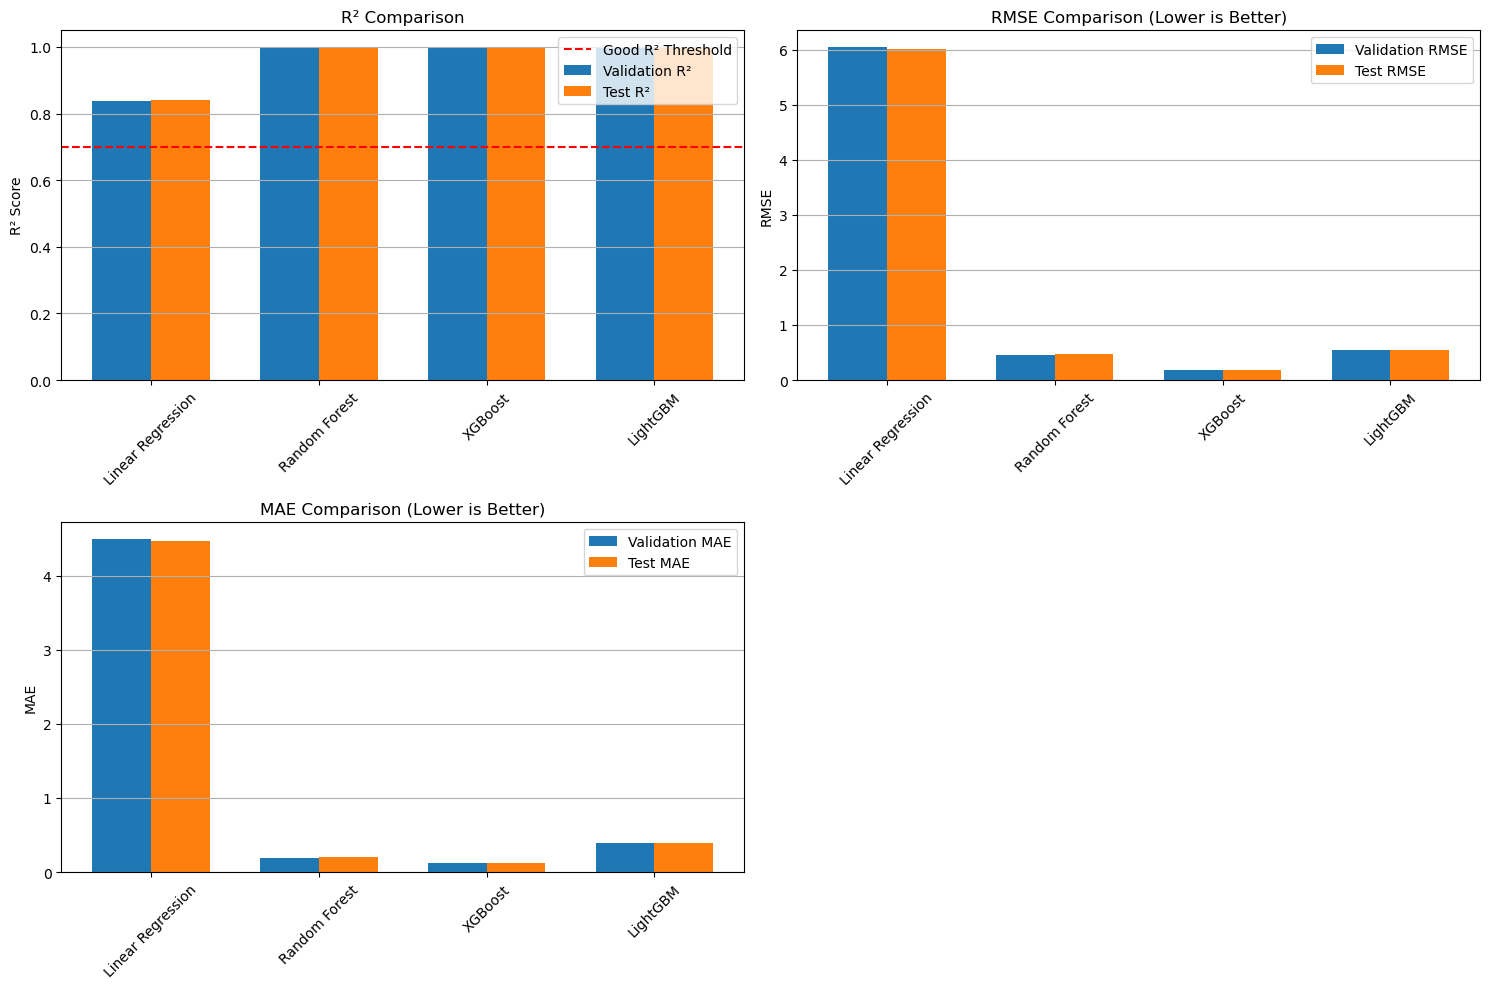


Model Recommendation:
Based on Test R² score, the best performing model is: XGBoost

Detailed Analysis of Best Model:
XGBoost Strengths:
- Often achieves higher accuracy than Random Forest
- Handles regularization to prevent overfitting
- Efficient implementation for large datasets
- Good at capturing non-linear patterns

XGBoost Weaknesses:
- More parameters to tune compared to Random Forest
- Can overfit if not properly configured
- Less interpretable than linear models

Suggestions for Model Improvement:
1. Hyperparameter Tuning: Perform grid search or random search for optimal parameters
2. Feature Engineering: Create additional features that might capture seasonal patterns
3. Ensemble Methods: Combine predictions from multiple models for better accuracy
4. Data Augmentation: Generate synthetic data if the dataset is small
5. Regularization: Apply appropriate regularization techniques to prevent overfitting


In [ ]:
# Model Comparison
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create dataframe for comparison (in order)
results_df = pd.DataFrame([lr_results, rf_results, xgb_results, lgb_results])

# Print tabular comparison
print("Model Performance Comparison:")
print(results_df.set_index('Model').round(4))

# Create visual comparison
plt.figure(figsize=(15, 10))

models = results_df['Model']
x = np.arange(len(models))
width = 0.35

# R² comparison
plt.subplot(2, 2, 1)
plt.bar(x - width/2, results_df['Val R²'], width, label='Validation R²')
plt.bar(x + width/2, results_df['Test R²'], width, label='Test R²')
plt.axhline(y=0.7, color='r', linestyle='--', label='Good R² Threshold')
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, axis='y')

# RMSE comparison
plt.subplot(2, 2, 2)
plt.bar(x - width/2, results_df['Val RMSE'], width, label='Validation RMSE')
plt.bar(x + width/2, results_df['Test RMSE'], width, label='Test RMSE')
plt.ylabel('RMSE')
plt.title('RMSE Comparison (Lower is Better)')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, axis='y')

# MAE comparison
plt.subplot(2, 2, 3)
plt.bar(x - width/2, results_df['Val MAE'], width, label='Validation MAE')
plt.bar(x + width/2, results_df['Test MAE'], width, label='Test MAE')
plt.ylabel('MAE')
plt.title('MAE Comparison (Lower is Better)')
plt.xticks(x, models, rotation=45)
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Final recommendation
print("\nModel Recommendation:")
best_model_index = results_df['Test R²'].idxmax()
best_model = results_df.loc[best_model_index, 'Model']
print(f"Based on Test R² score, the best performing model is: {best_model}")

# Detailed analysis of best model's strengths and weaknesses
print("\nDetailed Analysis of Best Model:")
if best_model == 'Random Forest':
    print("Random Forest Strengths:")
    print("- Robust to outliers and non-linear data")
    print("- Handles missing values well")
    print("- Provides feature importance")
    print("- Less prone to overfitting compared to decision trees")
    print("\nRandom Forest Weaknesses:")
    print("- Can be computationally expensive for large datasets")
    print("- Less interpretable than linear models")
elif best_model == 'XGBoost':
    print("XGBoost Strengths:")
    print("- Often achieves higher accuracy than Random Forest")
    print("- Handles regularization to prevent overfitting")
    print("- Efficient implementation for large datasets")
    print("- Good at capturing non-linear patterns")
    print("\nXGBoost Weaknesses:")
    print("- More parameters to tune compared to Random Forest")
    print("- Can overfit if not properly configured")
    print("- Less interpretable than linear models")
elif best_model == 'LightGBM':
    print("LightGBM Strengths:")
    print("- Fast training speed and high efficiency")
    print("- Handles large datasets well")
    print("- Good at capturing non-linear patterns")
    print("- Provides feature importance")
    print("\nLightGBM Weaknesses:")
    print("- Sensitive to overfitting if not tuned properly")
    print("- Less interpretable than linear models")
elif best_model == 'Linear Regression':
    print("Linear Regression Strengths:")
    print("- Simple and interpretable")
    print("- Fast to train")
    print("- Works well with linearly separable data")
    print("\nLinear Regression Weaknesses:")
    print("- Assumes linear relationship between features and target")
    print("- Sensitive to outliers")
    print("- May not capture complex patterns in data")

# Suggestions for model improvement
print("\nSuggestions for Model Improvement:")
print("1. Hyperparameter Tuning: Perform grid search or random search for optimal parameters")
print("2. Feature Engineering: Create additional features that might capture seasonal patterns")
print("3. Ensemble Methods: Combine predictions from multiple models for better accuracy")
print("4. Data Augmentation: Generate synthetic data if the dataset is small")
print("5. Regularization: Apply appropriate regularization techniques to prevent overfitting")


# Save model LGBM for use  

In [ ]:
import joblib

# --- Enregistrer le modèle LightGBM ---
model_filename = "QS_lightgbm_model_NotTuned.pkl"
joblib.dump(lgb_model, model_filename)
print(f"Modèle enregistré sous : {model_filename}")


Modèle enregistré sous : QS_lightgbm_model.pkl


# Test Model on External data test : dfFinalTest ( Before Tuning Params)

📌 Final Test Data Evaluation:
✅ RMSE: 0.5739
✅ R² Score: 0.9985


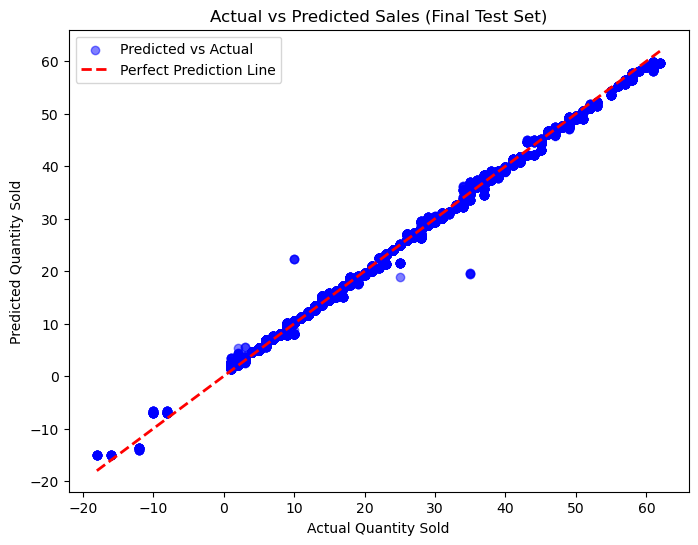

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Make predictions
y_final_pred = lgb_model.predict(X_final_test)

# If dfFinalTest has actual target values, evaluate performance
if target_column in dfFinalTest:
    y_final_actual = dfFinalTest[target_column]
    
    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_final_actual, y_final_pred))
    r2 = r2_score(y_final_actual, y_final_pred)

    print(f"📌 Final Test Data Evaluation:")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_final_actual, y_final_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_final_actual), max(y_final_actual)], [min(y_final_actual), max(y_final_actual)], 
             color="red", linestyle="dashed", linewidth=2, label="Perfect Prediction Line")
    plt.xlabel("Actual Quantity Sold")
    plt.ylabel("Predicted Quantity Sold")
    plt.title("Actual vs Predicted Sales (Final Test Set)")
    plt.legend()
    plt.show()
    
else:
    print("⚠️ No actual values found in dfFinalTest. Predictions only:")
    print(y_final_pred[:10])  # Display first 10 predictions


## Save Data for Power BI 

In [ ]:
# ✅ Assumes df_unencodedColumns is your original dataframe (before encoding)
# It must include 'CustomerID' and 'ProductID' and be indexed properly (e.g., same as X)

# --- Create validation export df (2015–2019) ---
df_val_export = X_val.copy()
df_val_export["Actual_Sales"] = y_val.values
df_val_export["Predicted_Sales"] = y_val_pred_lgb
df_val_export["Dataset"] = "2015-2019"
df_val_export["CustomerID"] = df_unencodedColumns.loc[X_val.index, "CustomerID"].values
df_val_export["ProductID"] = df_unencodedColumns.loc[X_val.index, "ProductID"].values

# --- Create test export df (2020) ---
df_test_export = X_test.copy()
df_test_export["Actual_Sales"] = y_test.values
df_test_export["Predicted_Sales"] = y_test_pred_lgb
df_test_export["Dataset"] = "2020"
df_test_export["CustomerID"] = df_unencodedColumns.loc[X_test.index, "CustomerID"].values
df_test_export["ProductID"] = df_unencodedColumns.loc[X_test.index, "ProductID"].values

# --- Combine both ---
df_combined_export = pd.concat([df_val_export, df_test_export], ignore_index=True)

# --- Optional: reorder columns if needed ---
cols_order = ["CustomerID", "ProductID", "Actual_Sales", "Predicted_Sales", "Dataset"] + \
             [col for col in df_combined_export.columns if col not in ["CustomerID", "ProductID", "Actual_Sales", "Predicted_Sales", "Dataset"]]
df_combined_export = df_combined_export[cols_order]

# --- Save to CSV ---
df_combined_export.to_csv("sales_prediction_results.csv", index=False)

print("✅ File 'sales_prediction_results.csv' saved successfully.")


✅ File 'sales_prediction_results.csv' saved successfully.


#  Hyperparameter Tuning with Optuna of RF

1️⃣ GridSearchCV (Exhaustive Search)

📌 What it does

Brute-force search over a predefined set of hyperparameter values.

It trains and evaluates the model on every possible combination of parameters.

Uses cross-validation to determine the best set.

📌 Pros

✅ Simple to understand and implement.

✅ Guarantees finding the best combination (if within the search space).

📌 Cons

❌ Computationally expensive for large search spaces.

❌ Doesn't adapt based on previous results (tries all combinations blindly).

2️⃣ Optuna (Smart Search)

📌 What it does

Optimized search using Bayesian Optimization.

Learns from previous results to focus on promising regions.

Uses pruning to stop bad models early, saving time.

📌 Pros

✅ Much faster than GridSearchCV.

✅ Finds better hyperparameters in fewer trials.

✅ Can handle large search spaces efficiently.


📌 Cons

❌ Doesn't guarantee the absolute best solution (but finds close enough).

❌ Requires some tuning of the search algorithm.


In [29]:
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

def objective(trial):
    # Hyperparameter search space
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.4, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Train the model with LightGBM
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    # Custom loss function
    # Penalize R² > 0.99
    penalty = 10 * (r2 - 0.99) if r2 > 0.99 else 0

    # Composite metric: Minimize MAE and RMSE while keeping R² < 0.99
    loss = mae + rmse + penalty

    return loss

# Run the Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Hyperparameters:", study.best_trial.params)
print("Best Loss (Composite of MAE, RMSE, and R² constraint):", study.best_trial.value)


[I 2025-05-09 13:10:24,792] A new study created in memory with name: no-name-d64f52e1-e2ff-4c40-a761-247011239f42
[I 2025-05-09 13:10:52,632] Trial 0 finished with value: 0.13627863318724145 and parameters: {'num_leaves': 44, 'max_depth': 18, 'learning_rate': 0.13146753749774298, 'n_estimators': 990, 'min_child_samples': 34}. Best is trial 0 with value: 0.13627863318724145.
[I 2025-05-09 13:11:02,151] Trial 1 finished with value: 0.16697732742122348 and parameters: {'num_leaves': 80, 'max_depth': 18, 'learning_rate': 0.2010228125692776, 'n_estimators': 149, 'min_child_samples': 57}. Best is trial 0 with value: 0.13627863318724145.
[I 2025-05-09 13:11:43,147] Trial 2 finished with value: 0.1599306278063956 and parameters: {'num_leaves': 134, 'max_depth': 19, 'learning_rate': 0.04824389824421304, 'n_estimators': 784, 'min_child_samples': 60}. Best is trial 0 with value: 0.13627863318724145.
[I 2025-05-09 13:11:52,117] Trial 3 finished with value: 1.98148527969045 and parameters: {'num_le

Best Hyperparameters: {'num_leaves': 146, 'max_depth': 13, 'learning_rate': 0.10009115678315592, 'n_estimators': 416, 'min_child_samples': 5}
Best Loss (Composite of MAE, RMSE, and R² constraint): 0.10000180846708498


In [ ]:
best_params = {
    'num_leaves': 60,
    'max_depth': 11,
    'learning_rate': 0.027, # augmen learning rate ===> augment r²
    'n_estimators': 105,
    'min_child_samples': 7
}

# R²= 0.9976

In [ ]:
best_params = {
    'num_leaves': 60,
    'max_depth': 15,
    'learning_rate': 0.0114,
    'n_estimators': 150,
    'min_child_samples': 5
}

# R²= 0.96

# Train LightGBM with Best Parameters and Evaluation

## Eval on test data 

Test RMSE: 1.0673
Test MAE: 0.9004
Test R² Score: 0.9950


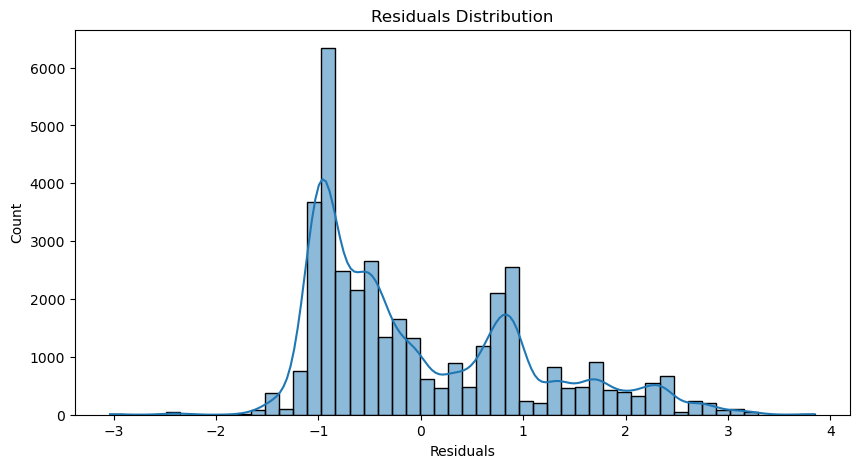

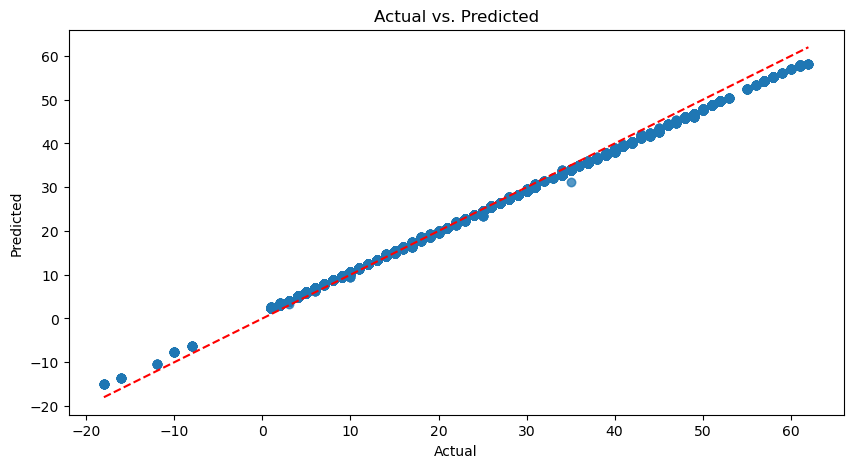

In [67]:
best_model = lgb.LGBMRegressor(**best_params, random_state=42)

# Train the model
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Predictions
y_test_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


Test RMSE: 0.0578
Test MAE: 0.0055
Test R² Score: 1.0000


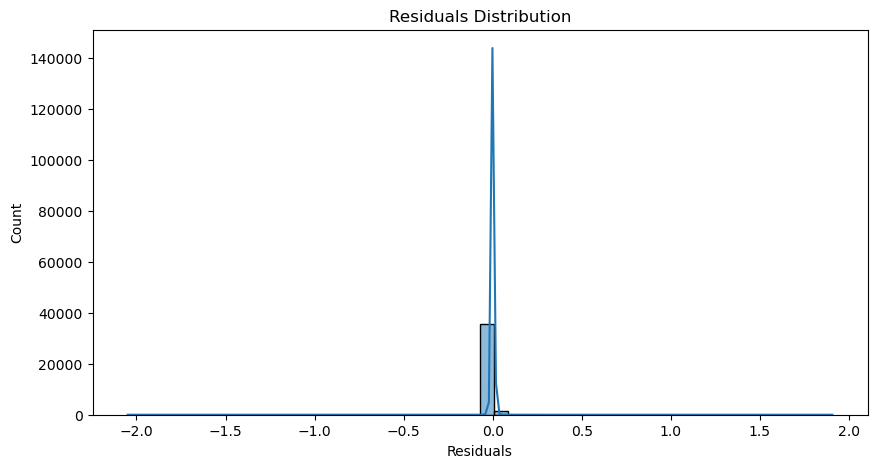

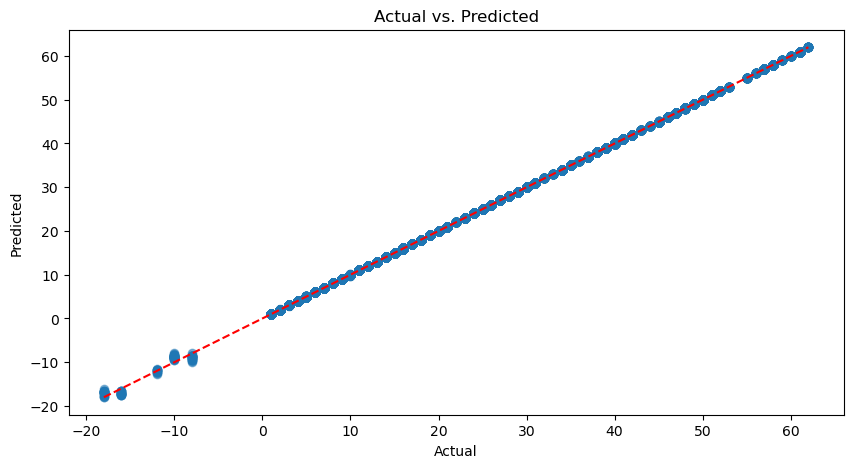

In [28]:
best_model = lgb.LGBMRegressor(**best_params, random_state=42)

# Train the model
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")

# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


## Eval on data 2020

📌 Final Test Data Evaluation:
✅ RMSE: 0.7404
✅ MAE: 0.6247
✅ R² Score: 0.9976


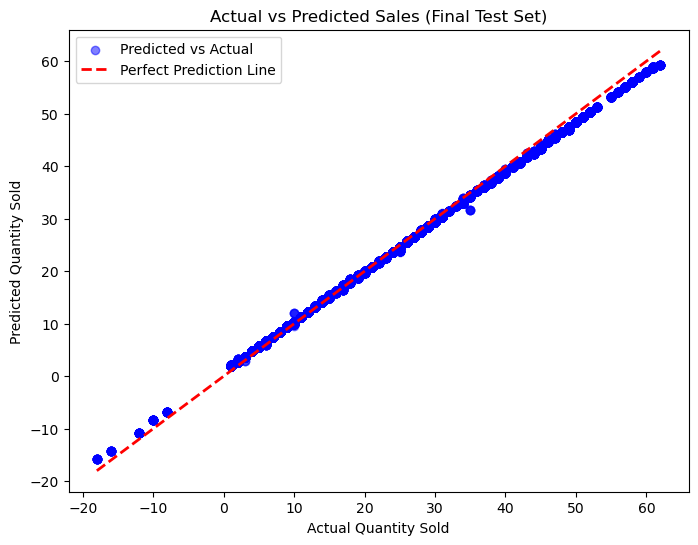

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Make predictions
y_final_pred = best_model.predict(X_final_test)

# If dfFinalTest has actual target values, evaluate performance
if target_column in dfFinalTest:
    y_final_actual = dfFinalTest[target_column]
    
    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_final_actual, y_final_pred))
    mae = mean_absolute_error(y_final_actual, y_final_pred)
    r2 = r2_score(y_final_actual, y_final_pred)

    print(f"📌 Final Test Data Evaluation:")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_final_actual, y_final_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
    plt.plot([min(y_final_actual), max(y_final_actual)], [min(y_final_actual), max(y_final_actual)], 
             color="red", linestyle="dashed", linewidth=2, label="Perfect Prediction Line")
    plt.xlabel("Actual Quantity Sold")
    plt.ylabel("Predicted Quantity Sold")
    plt.title("Actual vs Predicted Sales (Final Test Set)")
    plt.legend()
    plt.show()
    
else:
    print("⚠️ No actual values found in dfFinalTest. Predictions only:")
    print(y_final_pred[:10])  # Display first 10 predictions



# Feature Importance Analysis of the model after fine tunis params

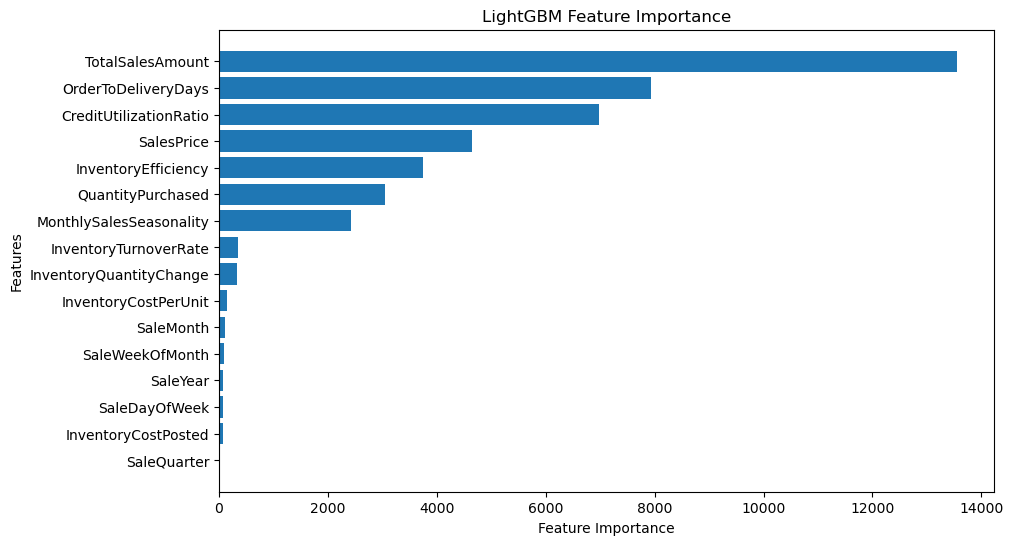

Test RMSE: 0.0022
Test MAE: 0.0005
Test R² Score: 1.0000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_columns)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()



## Save External Data (2020) for power Bi

In [28]:
# Create DataFrame with original features (unscaled for readability)
df_export = dfFinalTest[feature_columns].copy()

# Add predicted values
df_export["Predicted_InventoryEfficiency"] = y_final_pred

# Add actual values if they exist
if target_column in dfFinalTest:
    df_export["Actual_InventoryEfficiency"] = y_final_actual.values
    df_export["Dataset"] = "FinalTest2020"


# Convert all columns to acceptable CSV formats (especially object columns)
for col in df_export.columns:
    if df_export[col].apply(lambda x: isinstance(x, (list, dict, np.ndarray))).any():
        print(f"⚠️ Column '{col}' contains non-serializable values like lists or arrays.")
        df_export[col] = df_export[col].astype(str)  # Convert to string for CSV compatibility


# Save to CSV
df_export.to_csv("Sales_Predection_bestmodel_results.csv", index=False)

print("✅ Final predictions (Best Model) saved to 'Sales_Predection_bestmodel_results.csv'")


✅ Final predictions (Best Model) saved to 'Sales_Predection_bestmodel_results.csv'


# Save Model after Fine tuning params 

In [ ]:
import joblib

joblib.dump(best_model, "QSPredection_lgbm_model_finetuned.pkl")
print("Model saved successfully!")


Model saved successfully!
